**Data processing with the following tasks:**


Perform quality control checks on the data using basic plots, including
assessing missing values and outliers. -> Violin Plot


---


Check for batch effects using a dimensionality reduction technique. -> PCA


---


Conduct clustering of the samples to identify any subgroups or clusters of patients that exhibit similar proteomic profiles. -> Clustermap


---


Conduct hypothesis testing to identify differentially expressed proteins between two groups, e.g. tumor vs. normal tissue, young vs. old patients.
-> t-test


---


Conduct enrichment analysis to identify biological pathways and GO terms that are enriched for the differentially expressed proteins.
-> g:Profiler


---


Conduct advanced hypothesis testing to identify proteins that are differentially expressed for a metadata annotation with >2 categories, e.g. cancer subtype, smoking history, different age ranges. -> ANOVA


---


Interpret the results of the analyses in the context of the underlying biology of the cancer subtype and generate hypotheses for future experiments.


Final Assignment. Case study

Study: Breast cancer
  Article: ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Breast_cancer/Krug2020.pdf
  Data: ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Breast_cancer/data/proteinGroups.txt
  Sample annotation: ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Breast_cancer/metadata/S039_Breast_Cancer_Prospective_Collection_Specimens_r1.xlsx
  Clinical metadata: ftp://129.187.44.58/public/public/HTDataAnalysisPython/data/Case_studies/CPTAC_Breast_cancer/metadata/S039_BRCA_propective_clinical_data_r1.xlsx
Basic plot: Violin plot
Dimensionality reduction: PCA
Clustering technique: Clustermap
Hypothesis testing: t-test
Advanced hypothesis testing: ANOVA
Enrichment tool: g:Profiler

In [1]:
#Import of the necessary Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing of the Data

In [4]:
#Import of the necessary Data provided for the Breast cancer publication
breast_cancer_df = pd.read_csv("proteinGroups.txt", sep='\t', low_memory=False)
breast_cancer_df

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,A0A024RBG1,A0A024RBG1,15,2,2,NaN,NUDT4,sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...,1,15,...,0,449;67247;67345;72041;133792;139464;139465;176...,False;False;False;False;False;True;True;False;...,478;70563;70667;75597;140463;146403;146404;186...,5679;5680;5681;5682;5683;5684;5685;5686;5687;5...,6414;6415;6416;6417;6418;6419;6420;6421;6422;6...,6416;889848;890916;957880;1769237;1844523;1844...,NaN,NaN,-1
1,A0A075B6H7,A0A075B6H7,6,6,5,NaN,IGKV3-7,sp|A0A075B6H7|KV37_HUMAN Probable non-function...,1,6,...,1,18855;18856;20395;54907;139841;139842,True;True;True;True;True;True,19889;19890;21495;57630;146801;146802,229835;229836;229837;248359;248360;651160;6511...,258876;258877;258878;279775;279776;734471;7344...,258876;258878;279776;734473;1849640;1849695,NaN,NaN,-1
2,A0A075B6H9,A0A075B6H9,4,3,3,NaN,IGLV4-69,sp|A0A075B6H9|LV469_HUMAN Immunoglobulin lambd...,1,4,...,2,75334;79687;79688;143210,True;False;True;True,79094;83679;83680;150455,888776;888777;888778;888779;888780;888781;8887...,1003082;1003083;1003084;1003085;1003086;100308...,1003104;1064061;1064074;1894545,NaN,NaN,-1
3,A0A075B6I0,A0A075B6I0,4,4,4,NaN,IGLV8-61,sp|A0A075B6I0|LV861_HUMAN Immunoglobulin lambd...,1,4,...,3,75328;216353;216354;228803,True;True;True;True,79088;228747;228748;241767,888610;888611;888612;888613;888614;888615;8886...,1002906;1002907;1002908;1002909;1002910;100291...,1002916;2838371;2838381;3002042,NaN,NaN,-1
4,A0A075B6I1,A0A075B6I1,5,5,5,NaN,IGLV4-60,sp|A0A075B6I1|LV460_HUMAN Immunoglobulin lambd...,1,5,...,4,15771;75333;91611;91612;131296,True;True;True;True;True,16688;79093;96230;96231;137864,193664;193665;888753;888754;888755;888756;8887...,218207;218208;1003059;1003060;1003061;1003062;...,218208;1003059;1223877;1223883;1737744,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,REV__Q9Y2X3,REV__Q9Y2X3,2,1,1,NaN,NaN,sp|Q9Y2X3|NOP58_HUMAN Nucleolar protein 58 OS=...,1,2,...,11935,127272;240396,True;False,133662;253993,1494026;1494027;1494028;1494029;2808920;280892...,1684693;1684694;1684695;1684696;3164415;316441...,1684696;3164427,12937,250,-1
11936,REV__Q9Y577,REV__Q9Y577,1,1,1,NaN,NaN,sp|Q9Y577|TRI17_HUMAN E3 ubiquitin-protein lig...,1,1,...,11936,94737,True,99493,1123321,1266699,1266699,12938,12,-1
11937,REV__Q9Y6D5;REV__Q9Y6D6,REV__Q9Y6D5,3;1,3;1,3;1,NaN,NaN,sp|Q9Y6D5|BIG2_HUMAN Brefeldin A-inhibited gua...,2,3,...,11937,70224;105324;113858,True;True;True,73677;110612;119650,826719;1245928;1349562;1349563;1349564;1349565,932828;1403709;1519965;1519966;1519967;1519968,932828;1403709;1519966,12939,1288,-1;-1
11938,REV__Q9Y6T7,REV__Q9Y6T7,1,1,1,NaN,NaN,sp|Q9Y6T7|DGKB_HUMAN Diacylglycerol kinase bet...,1,1,...,11938,158319,True,167102,1865418,2100771,2100771,12940,695,-1


In [5]:
# Showing the columns of the dataframe
breast_cancer_df.columns.to_list()

['Protein IDs',
 'Majority protein IDs',
 'Peptide counts (all)',
 'Peptide counts (razor+unique)',
 'Peptide counts (unique)',
 'Protein names',
 'Gene names',
 'Fasta headers',
 'Number of proteins',
 'Peptides',
 'Razor + unique peptides',
 'Unique peptides',
 'Peptides 1',
 'Peptides 10',
 'Peptides 11',
 'Peptides 12',
 'Peptides 13',
 'Peptides 14',
 'Peptides 15',
 'Peptides 16',
 'Peptides 17',
 'Peptides 2',
 'Peptides 3',
 'Peptides 4',
 'Peptides 5',
 'Peptides 6',
 'Peptides 7',
 'Peptides 8',
 'Peptides 9',
 'Razor + unique peptides 1',
 'Razor + unique peptides 10',
 'Razor + unique peptides 11',
 'Razor + unique peptides 12',
 'Razor + unique peptides 13',
 'Razor + unique peptides 14',
 'Razor + unique peptides 15',
 'Razor + unique peptides 16',
 'Razor + unique peptides 17',
 'Razor + unique peptides 2',
 'Razor + unique peptides 3',
 'Razor + unique peptides 4',
 'Razor + unique peptides 5',
 'Razor + unique peptides 6',
 'Razor + unique peptides 7',
 'Razor + unique

In [6]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Columns: 656 entries, Protein IDs to Taxonomy IDs
dtypes: float64(389), int64(246), object(21)
memory usage: 59.8+ MB


In [7]:
breast_cancer_df.describe()

,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides 1,Peptides 10,Peptides 11,Peptides 12,Peptides 13,Peptides 14,...,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6,Intensity 7,Intensity 8,Intensity 9,MS/MS count,id
count,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,...,1.194000e+04,1.194000e+04,1.194000e+04,1.194000e+04,1.194000e+04,1.194000e+04,1.194000e+04,1.194000e+04,11940.000000,11940.000000
mean,1.068928,23.375377,22.357286,21.513987,12.638861,12.345980,9.993719,11.952680,11.176298,7.174121,...,2.440899e+10,2.455521e+10,1.606989e+10,2.390512e+10,2.285736e+10,2.153015e+10,1.435845e+10,1.616014e+10,296.231993,5969.500000
std,0.380031,27.692225,27.436671,26.711462,17.530151,17.872541,14.558214,17.149027,17.563196,14.488067,...,1.815386e+11,2.981982e+11,1.325026e+11,1.797017e+11,1.791914e+11,1.698435e+11,1.119529e+11,1.365914e+11,673.814316,3446.925442
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,7.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,...,1.362575e+08,6.850300e+07,7.319475e+07,7.954450e+07,8.694250e+07,9.465650e+07,5.567000e+07,5.560925e+07,27.000000,2984.750000
50%,1.000000,16.000000,15.000000,14.000000,8.000000,7.000000,6.000000,7.000000,6.000000,2.000000,...,1.547450e+09,1.122100e+09,9.586800e+08,1.258850e+09,1.306050e+09,1.232250e+09,7.723800e+08,8.097050e+08,125.000000,5969.500000
75%,1.000000,30.000000,29.000000,28.000000,17.000000,16.000000,13.000000,16.000000,15.000000,9.000000,...,9.469850e+09,7.843875e+09,5.896975e+09,8.567500e+09,8.429375e+09,8.271725e+09,5.174125e+09,5.674625e+09,351.000000,8954.250000
max,13.000000,694.000000,694.000000,691.000000,387.000000,437.000000,377.000000,410.000000,546.000000,490.000000,...,1.486100e+13,2.928300e+13,1.142600e+13,1.467100e+13,1.499300e+13,1.463600e+13,9.350300e+12,1.215900e+13,40393.000000,11939.000000


In [8]:
missing_col = breast_cancer_df.isnull().sum()
missing_col[missing_col > 0]

Protein names                     394
Gene names                        359
Fasta headers                      58
Fraction average                    1
Fraction 1                       3477
Fraction 2                       3475
Fraction 3                       3798
Fraction 4                       3823
Fraction 5                       3935
Fraction 6                       3714
Fraction 7                       3598
Fraction 8                       3754
Fraction 9                       3773
Fraction 10                      3686
Fraction 11                      3673
Fraction 12                      3720
Fraction 13                      3690
Fraction 14                      3740
Fraction 15                      3806
Fraction 16                      3650
Fraction 17                      3630
Fraction 18                      3716
Fraction 19                      3806
Fraction 20                      3911
Fraction 21                      3973
Fraction 22                      3895
Fraction 23 

In [9]:
#Making a copy for the further analysis of the dataframe
breast_cancer = breast_cancer_df.copy()

In [10]:
#For further analysis, only selecting the columns with "Reporter intensity corrected"
reporter_channels = [col for col in breast_cancer.columns if col.startswith("Reporter intensity corrected")]
reporter_channels

['Reporter intensity corrected 1 1',
 'Reporter intensity corrected 2 1',
 'Reporter intensity corrected 3 1',
 'Reporter intensity corrected 4 1',
 'Reporter intensity corrected 5 1',
 'Reporter intensity corrected 6 1',
 'Reporter intensity corrected 7 1',
 'Reporter intensity corrected 8 1',
 'Reporter intensity corrected 9 1',
 'Reporter intensity corrected 10 1',
 'Reporter intensity corrected 1 10',
 'Reporter intensity corrected 2 10',
 'Reporter intensity corrected 3 10',
 'Reporter intensity corrected 4 10',
 'Reporter intensity corrected 5 10',
 'Reporter intensity corrected 6 10',
 'Reporter intensity corrected 7 10',
 'Reporter intensity corrected 8 10',
 'Reporter intensity corrected 9 10',
 'Reporter intensity corrected 10 10',
 'Reporter intensity corrected 1 11',
 'Reporter intensity corrected 2 11',
 'Reporter intensity corrected 3 11',
 'Reporter intensity corrected 4 11',
 'Reporter intensity corrected 5 11',
 'Reporter intensity corrected 6 11',
 'Reporter intensity

From the "S039_Breast_Cancer_Prospective_Collection_Specimens_r1" document, the retrospective study reference is the Run 63 with the TMT Channel 130C and the TMT experiments 7. This corresponds to the batch 7.

But which mesurement is the corresponding one in the data?

-> 130C corresponds to the channel 7

Selecting of the relevant columns (same as in the previous Tasks) and the reporter intensity corrected columns into one dataframe.

In [11]:
relevant_columns = ["Protein IDs", "Majority protein IDs", "Protein names", "Gene names",
                    "Q-value", "Score", "Reverse", "Potential contaminant"]
relevant_columns = relevant_columns + reporter_channels

Only selecting the relevant columns out of the total dataframe "breast_cancer" with the loc function.

In [12]:
breast_cancer = breast_cancer.loc[:, relevant_columns]
breast_cancer

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 7 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.0,14.575,NaN,NaN,616360.0,518000.0,...,249720.0,647610.0,526230.0,221200.0,260260.0,188540.0,398610.0,379470.0,193690.0,298870.0
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.0,17.356,NaN,NaN,459750.0,269740.0,...,3414900.0,1994100.0,879860.0,3325200.0,1786600.0,709230.0,1134800.0,4153100.0,1334000.0,2333800.0
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.0,28.455,NaN,NaN,1625800.0,960870.0,...,419000.0,205850.0,271400.0,707460.0,2059400.0,323620.0,192140.0,348110.0,270970.0,543150.0
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.0,20.887,NaN,NaN,4006500.0,3117800.0,...,2220400.0,907870.0,2148500.0,1333500.0,8193500.0,1480900.0,3776100.0,4001500.0,1194500.0,2353800.0
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.0,35.168,NaN,NaN,247600.0,149800.0,...,541420.0,385950.0,1282800.0,675820.0,4927800.0,1090600.0,103190.0,563290.0,176860.0,1074600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,REV__Q9Y2X3,REV__Q9Y2X3,NaN,NaN,1.0,-2.000,+,NaN,0.0,0.0,...,80198.0,80082.0,72253.0,97070.0,67638.0,88495.0,83533.0,82448.0,103700.0,92863.0
11936,REV__Q9Y577,REV__Q9Y577,NaN,NaN,1.0,-2.000,+,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11937,REV__Q9Y6D5;REV__Q9Y6D6,REV__Q9Y6D5,NaN,NaN,1.0,-2.000,+,NaN,0.0,0.0,...,126280.0,201300.0,376620.0,420450.0,727920.0,12474000.0,0.0,421970.0,377320.0,1125900.0
11938,REV__Q9Y6T7,REV__Q9Y6T7,NaN,NaN,1.0,-2.000,+,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating relative intensities with a reference (this code is given from the course instructor)

In [13]:
# Use this function but remember to use the right parameters in the function call!
# In Google Colab, this function takes 3-5 minutes. In PyCharm, it takes less than a minute.

def calculate_relative_intensity(row, reference_channel, list_of_batches):
    # Get pd.Series of all reference channels, i.e. all "Reporter intensity corrected <REF> <BATCH>" values
    row_references = row.loc[row.index.str.startswith(f'Reporter intensity corrected {reference_channel}')]
    # Kick out references of zero for further calculations
    row_references = row_references.loc[row_references != 0]
    # Get median for normalization
    row_median = row_references.median()

    if np.isnan(row_median):
        row_median = 0

    for batch in list_of_batches:
        # Get reference value by
        #   a) isolating all channels for this batch, and
        #   b) taking the n-th entry of all references, where n is your reference channel
        reference = row.loc[row.index.str.endswith(str(batch))].iloc[reference_channel - 1]

        if reference == 0:
            row.loc[row.index.str.endswith(str(batch))] = 0

        else:
            # Divide all channels by the reference, store in variable "channels", and...
            channels = row.loc[row.index.str.endswith(str(batch))] / reference
            # ...overwrite the old channel values with the new ones
            row.loc[row.index.str.endswith(str(batch))] = channels

    # Median normalization: Multiply all generated relative intensities with the median of reference intensities for this protein across all batches
    row.loc[row.index.str.startswith('Reporter intensity corrected')] = row.loc[row.index.str.startswith('Reporter intensity corrected')] * row_median
    return row


For the upper code, it is necessary to add a dataframe with the batch numbers.

In [14]:
batch_df = [i for i in range(1, 9)]
batch_df

[1, 2, 3, 4, 5, 6, 7, 8]

Know there is all the necessary information given for running the previous code, to calculate the relative intensity.

In [15]:
breast_cancer = breast_cancer.apply(calculate_relative_intensity, axis=1, reference_channel=7, list_of_batches=batch_df)

The following new dataframe has the calculated relative intensities inside of the reporter intensity corrected collumns.

In [16]:
breast_cancer

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 7 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.0,14.575,NaN,NaN,7.256958e+05,6.098877e+05,...,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.240833e+11,1.181252e+11,6.029376e+10,9.303524e+10
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.0,17.356,NaN,NaN,8.112572e+06,4.759728e+06,...,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,6.693504e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.0,28.455,NaN,NaN,1.227037e+06,7.251955e+05,...,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,9.439070e+10,1.710125e+11,1.331167e+11,2.668279e+11
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.0,20.887,NaN,NaN,5.889598e+06,4.583200e+06,...,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.163728e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.0,35.168,NaN,NaN,5.526323e+05,3.343470e+05,...,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,5.628911e+10,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,REV__Q9Y2X3,REV__Q9Y2X3,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.172975e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,REV__Q9Y577,REV__Q9Y577,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,REV__Q9Y6D5;REV__Q9Y6D6,REV__Q9Y6D5,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,0.000000e+00,1.126470e+11,1.007275e+11,3.005646e+11
11938,REV__Q9Y6T7,REV__Q9Y6T7,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Know the reference columns can be deleted from the dataframe, because there is no more need for them. This can be performed with the loc function as mentioned earlier. To correctly choose the reference columns, the batch with number 9 can be picked up by making the function in the other direction with using ~.

In [17]:
breast_cancer = breast_cancer.loc[:, ~ breast_cancer.columns.str.startswith("Reporter intensity corrected 7")]
breast_cancer

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.0,14.575,NaN,NaN,7.256958e+05,6.098877e+05,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.0,17.356,NaN,NaN,8.112572e+06,4.759728e+06,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.0,28.455,NaN,NaN,1.227037e+06,7.251955e+05,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.0,20.887,NaN,NaN,5.889598e+06,4.583200e+06,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.0,35.168,NaN,NaN,5.526323e+05,3.343470e+05,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,REV__Q9Y2X3,REV__Q9Y2X3,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,6.602866e+04,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,REV__Q9Y577,REV__Q9Y577,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,REV__Q9Y6D5;REV__Q9Y6D6,REV__Q9Y6D5,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,1.126470e+11,1.007275e+11,3.005646e+11
11938,REV__Q9Y6T7,REV__Q9Y6T7,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Now, the reporter_channel dataframe needs to be corrected, by using the same code fragment as previous used.

In [18]:
reporter_channels = [col for col in breast_cancer.columns if col.startswith("Reporter intensity corrected")]
reporter_channels

['Reporter intensity corrected 1 1',
 'Reporter intensity corrected 2 1',
 'Reporter intensity corrected 3 1',
 'Reporter intensity corrected 4 1',
 'Reporter intensity corrected 5 1',
 'Reporter intensity corrected 6 1',
 'Reporter intensity corrected 8 1',
 'Reporter intensity corrected 9 1',
 'Reporter intensity corrected 10 1',
 'Reporter intensity corrected 1 10',
 'Reporter intensity corrected 2 10',
 'Reporter intensity corrected 3 10',
 'Reporter intensity corrected 4 10',
 'Reporter intensity corrected 5 10',
 'Reporter intensity corrected 6 10',
 'Reporter intensity corrected 8 10',
 'Reporter intensity corrected 9 10',
 'Reporter intensity corrected 10 10',
 'Reporter intensity corrected 1 11',
 'Reporter intensity corrected 2 11',
 'Reporter intensity corrected 3 11',
 'Reporter intensity corrected 4 11',
 'Reporter intensity corrected 5 11',
 'Reporter intensity corrected 6 11',
 'Reporter intensity corrected 8 11',
 'Reporter intensity corrected 9 11',
 'Reporter intensit

The batch 7 is deleted.

Selecting only the columns with reporter intensity corrected to see, wether there are rows only with the value 0. If there are some, they need to be deleted.

In [19]:
breast_cancer_without_batch7 = breast_cancer.loc[:, reporter_channels]
breast_cancer_without_batch7

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,7.256958e+05,6.098877e+05,4.070353e+05,3.032602e+05,3.188842e+05,3.769177e+05,3.459994e+05,1.610316e+05,4.215643e+05,4.733476e+10,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,8.112572e+06,4.759728e+06,2.400333e+06,6.964725e+06,7.701605e+06,1.009806e+07,6.289427e+06,5.584484e+06,7.413276e+06,1.484214e+13,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,1.227037e+06,7.251955e+05,1.318585e+06,1.183413e+06,5.722197e+05,4.780070e+05,7.158595e+05,2.539282e+05,8.007664e+05,1.496329e+11,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,5.889598e+06,4.583200e+06,4.704476e+06,6.341480e+05,3.985934e+06,1.129012e+06,2.062572e+06,3.907289e+06,3.437032e+06,2.433759e+12,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,5.526323e+05,3.343470e+05,9.907652e+05,9.734006e+05,1.575381e+06,1.202600e+06,9.365510e+05,4.338253e+05,7.978572e+05,3.481481e+10,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.892402e+09,...,6.602866e+04,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,1.126470e+11,1.007275e+11,3.005646e+11
11938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Result: there are rows exculsively with the Value 0.


In [20]:
breast_cancer_without_batch7

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,7.256958e+05,6.098877e+05,4.070353e+05,3.032602e+05,3.188842e+05,3.769177e+05,3.459994e+05,1.610316e+05,4.215643e+05,4.733476e+10,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,8.112572e+06,4.759728e+06,2.400333e+06,6.964725e+06,7.701605e+06,1.009806e+07,6.289427e+06,5.584484e+06,7.413276e+06,1.484214e+13,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,1.227037e+06,7.251955e+05,1.318585e+06,1.183413e+06,5.722197e+05,4.780070e+05,7.158595e+05,2.539282e+05,8.007664e+05,1.496329e+11,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,5.889598e+06,4.583200e+06,4.704476e+06,6.341480e+05,3.985934e+06,1.129012e+06,2.062572e+06,3.907289e+06,3.437032e+06,2.433759e+12,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,5.526323e+05,3.343470e+05,9.907652e+05,9.734006e+05,1.575381e+06,1.202600e+06,9.365510e+05,4.338253e+05,7.978572e+05,3.481481e+10,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.892402e+09,...,6.602866e+04,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,1.126470e+11,1.007275e+11,3.005646e+11
11938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [21]:
breast_cancer_without_batch7 != 0

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
11936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11937,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
11938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


All the False returns are the one with a 0 as Value.

A important part in the preprocessing is to delete the NaN or 0 Values. By looking at the dataframe, there are a lot of them.

In [22]:
without_zero_rows = breast_cancer_without_batch7[~breast_cancer_without_batch7[reporter_channels].eq(0).all(axis=1)]
without_zero_rows

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,7.256958e+05,6.098877e+05,4.070353e+05,3.032602e+05,3.188842e+05,3.769177e+05,3.459994e+05,1.610316e+05,4.215643e+05,4.733476e+10,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,8.112572e+06,4.759728e+06,2.400333e+06,6.964725e+06,7.701605e+06,1.009806e+07,6.289427e+06,5.584484e+06,7.413276e+06,1.484214e+13,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,1.227037e+06,7.251955e+05,1.318585e+06,1.183413e+06,5.722197e+05,4.780070e+05,7.158595e+05,2.539282e+05,8.007664e+05,1.496329e+11,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,5.889598e+06,4.583200e+06,4.704476e+06,6.341480e+05,3.985934e+06,1.129012e+06,2.062572e+06,3.907289e+06,3.437032e+06,2.433759e+12,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,5.526323e+05,3.343470e+05,9.907652e+05,9.734006e+05,1.575381e+06,1.202600e+06,9.365510e+05,4.338253e+05,7.978572e+05,3.481481e+10,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.892402e+09,...,6.602866e+04,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,1.126470e+11,1.007275e+11,3.005646e+11
11938,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Nearly 400 rows are now deletet. BUT: I need the relevant columns back and there, the now missing rows also need to be removed.

The following code, deletes the reporter intensity corrected rows, which only having the value 0. But this code is not deleting the other important columns.
To check wether it works or not, the value of 11547 rows needs to be still there.

In [23]:
selected_columns = [col for col in breast_cancer.columns if col.startswith("Reporter intensity corrected")]

breast_cancer_filtered = breast_cancer[(breast_cancer[selected_columns] != 0).any(axis=1)]

breast_cancer_filtered

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.0,14.575,NaN,NaN,7.256958e+05,6.098877e+05,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.0,17.356,NaN,NaN,8.112572e+06,4.759728e+06,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.0,28.455,NaN,NaN,1.227037e+06,7.251955e+05,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.0,20.887,NaN,NaN,5.889598e+06,4.583200e+06,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.0,35.168,NaN,NaN,5.526323e+05,3.343470e+05,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,REV__Q9Y2X3,REV__Q9Y2X3,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,6.602866e+04,4.006371e+09,4.000576e+09,3.609471e+09,4.849229e+09,3.378924e+09,4.420856e+09,4.118772e+09,5.180437e+09,4.639064e+09
11936,REV__Q9Y577,REV__Q9Y577,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11937,REV__Q9Y6D5;REV__Q9Y6D6,REV__Q9Y6D5,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,3.371108e+10,5.373804e+10,1.005406e+11,1.122412e+11,1.943219e+11,3.329997e+12,1.126470e+11,1.007275e+11,3.005646e+11
11938,REV__Q9Y6T7,REV__Q9Y6T7,NaN,NaN,1.0,-2.000,+,NaN,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Now the output shows, that there is the same amount of rows left as in the previous code but the other important columns are still there.

Last step is the deletion of gene names with NaN. But before deletion let´s transform the NaN into '' Values to make the deletion more easily.



In [24]:
breast_cancer_filtered['Gene names'] = breast_cancer_filtered['Gene names'].fillna('')

breast_cancer_filtered = breast_cancer_filtered[breast_cancer_filtered['Gene names'] != '']

breast_cancer_filtered

/tmp/ipykernel_11020/1215981911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_cancer_filtered['Gene names'] = breast_cancer_filtered['Gene names'].fillna('')


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000000,14.575,NaN,NaN,7.256958e+05,6.098877e+05,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.000000,17.356,NaN,NaN,8.112572e+06,4.759728e+06,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.000000,28.455,NaN,NaN,1.227037e+06,7.251955e+05,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,20.887,NaN,NaN,5.889598e+06,4.583200e+06,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.000000,35.168,NaN,NaN,5.526323e+05,3.343470e+05,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,0.000000,323.310,NaN,NaN,2.225174e+06,3.552188e+06,...,2.370676e+06,5.345833e+11,1.239378e+12,1.070930e+12,9.944844e+11,1.677029e+12,1.338445e+12,8.692690e+11,2.030885e+12,1.897289e+12
11714,Q9Y6Y8;REV__O15068,Q9Y6Y8,SEC23-interacting protein,SEC23IP,0.000000,323.310,NaN,NaN,4.108722e+07,2.483325e+07,...,1.782754e+07,2.308277e+14,6.757325e+14,3.259525e+14,4.207205e+14,2.906392e+14,6.361245e+14,3.561721e+14,2.239077e+14,3.847509e+14
11715,Q9Y6Y9,Q9Y6Y9,Lymphocyte antigen 96,LY96,0.000000,10.454,NaN,NaN,5.248937e+04,5.817546e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11716,Q9Y6Z7,Q9Y6Z7,Collectin-10,COLEC10,0.000094,5.122,NaN,NaN,2.981054e+05,2.687296e+05,...,1.044514e+05,4.752038e+10,1.214944e+11,6.377699e+10,5.532435e+10,4.457443e+10,1.948098e+10,4.859019e+10,5.529441e+10,5.299314e+10


The deletion of the NaN in the column Gene names deleted round about 321 rows.

Now, all the rows with more than 25 missing values are deleted.



In [25]:
breast_cancer_filtered = breast_cancer_filtered.dropna(axis=0, thresh=breast_cancer_filtered.shape[1]-25)
remaining_rows = breast_cancer_filtered.shape[0]
#print(df_row_cleaned)
print(remaining_rows)


11226


35 rows are deleted.

Now, to make sure there is no potential contaminantor reverse effect. The Values with a + are deleted.

In [27]:
breast_cancer_filtered = breast_cancer_filtered[(breast_cancer_filtered["Reverse"] != "+") & (breast_cancer_filtered["Potential contaminant"] != "+")]
breast_cancer_filtered


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000000,14.575,NaN,NaN,7.256958e+05,6.098877e+05,...,0.000000e+00,7.773534e+10,2.015945e+11,1.638101e+11,6.885735e+10,8.101634e+10,5.869062e+10,1.181252e+11,6.029376e+10,9.303524e+10
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.000000,17.356,NaN,NaN,8.112572e+06,4.759728e+06,...,1.677663e+07,2.014245e+13,1.176200e+13,5.189766e+12,1.961336e+13,1.053808e+13,4.183322e+12,2.449665e+13,7.868466e+12,1.376569e+13
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.000000,28.455,NaN,NaN,1.227037e+06,7.251955e+05,...,6.973149e+05,2.058379e+11,1.011259e+11,1.333280e+11,3.475468e+11,1.011701e+12,1.589816e+11,1.710125e+11,1.331167e+11,2.668279e+11
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,20.887,NaN,NaN,5.889598e+06,4.583200e+06,...,4.231500e+06,3.624359e+12,1.481916e+12,3.506997e+12,2.176672e+12,1.337425e+13,2.417273e+12,6.531648e+12,1.949782e+12,3.842108e+12
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.000000,35.168,NaN,NaN,5.526323e+05,3.343470e+05,...,1.899148e+06,2.953392e+11,2.105319e+11,6.997546e+11,3.686531e+11,2.688066e+12,5.949114e+11,3.072691e+11,9.647536e+10,5.861836e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,0.000000,323.310,NaN,NaN,2.225174e+06,3.552188e+06,...,2.370676e+06,5.345833e+11,1.239378e+12,1.070930e+12,9.944844e+11,1.677029e+12,1.338445e+12,8.692690e+11,2.030885e+12,1.897289e+12
11714,Q9Y6Y8;REV__O15068,Q9Y6Y8,SEC23-interacting protein,SEC23IP,0.000000,323.310,NaN,NaN,4.108722e+07,2.483325e+07,...,1.782754e+07,2.308277e+14,6.757325e+14,3.259525e+14,4.207205e+14,2.906392e+14,6.361245e+14,3.561721e+14,2.239077e+14,3.847509e+14
11715,Q9Y6Y9,Q9Y6Y9,Lymphocyte antigen 96,LY96,0.000000,10.454,NaN,NaN,5.248937e+04,5.817546e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11716,Q9Y6Z7,Q9Y6Z7,Collectin-10,COLEC10,0.000094,5.122,NaN,NaN,2.981054e+05,2.687296e+05,...,1.044514e+05,4.752038e+10,1.214944e+11,6.377699e+10,5.532435e+10,4.457443e+10,1.948098e+10,4.859019e+10,5.529441e+10,5.299314e+10


35 rows are deleted

Normalising the Reporter intensity corrected data and reimport them into the dataframe.

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

intensity_columns = [col for col in breast_cancer_filtered.columns if 'Reporter intensity corrected' in col]

intensity_data = breast_cancer_filtered[intensity_columns]

scaler = StandardScaler()

normalized_intensity_data = scaler.fit_transform(intensity_data)

breast_cancer_filtered[intensity_columns] = normalized_intensity_data

breast_cancer_filtered

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000000,14.575,NaN,NaN,-0.214871,-0.243345,...,-0.115429,-0.035571,-0.030548,-0.036062,-0.033938,-0.031353,-0.035060,-0.031496,-0.032398,-0.031213
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.000000,17.356,NaN,NaN,-0.023948,-0.127078,...,0.208391,-0.034342,-0.030020,-0.035661,-0.032861,-0.030770,-0.034751,-0.030131,-0.031890,-0.030549
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.000000,28.455,NaN,NaN,-0.201914,-0.240115,...,-0.101969,-0.035564,-0.030552,-0.036064,-0.033923,-0.031301,-0.035052,-0.031493,-0.032393,-0.031205
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,20.887,NaN,NaN,-0.081404,-0.132024,...,-0.033753,-0.035354,-0.030489,-0.035796,-0.033822,-0.030612,-0.034883,-0.031137,-0.032275,-0.031031
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.000000,35.168,NaN,NaN,-0.219344,-0.251065,...,-0.078772,-0.035558,-0.030547,-0.036019,-0.033922,-0.031208,-0.035020,-0.031485,-0.032395,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,0.000000,323.310,NaN,NaN,-0.176116,-0.160910,...,-0.069670,-0.035543,-0.030500,-0.035990,-0.033887,-0.031264,-0.034964,-0.031454,-0.032270,-0.031126
11714,Q9Y6Y8;REV__O15068,Q9Y6Y8,SEC23-interacting protein,SEC23IP,0.000000,323.310,NaN,NaN,0.828323,0.435329,...,0.228676,-0.021430,0.000296,-0.010097,-0.010754,-0.015155,0.012531,-0.011564,-0.017843,-0.012532
11715,Q9Y6Y9,Q9Y6Y9,Lymphocyte antigen 96,LY96,0.000000,10.454,NaN,NaN,-0.232271,-0.258803,...,-0.115429,-0.035576,-0.030557,-0.036075,-0.033942,-0.031358,-0.035064,-0.031502,-0.032402,-0.031218
11716,Q9Y6Z7,Q9Y6Z7,Collectin-10,COLEC10,0.000094,5.122,NaN,NaN,-0.225923,-0.252904,...,-0.113413,-0.035573,-0.030551,-0.036070,-0.033939,-0.031355,-0.035063,-0.031499,-0.032398,-0.031215


Preprocessing is done!

**Data processing with the following tasks:**


Perform quality control checks on the data using basic plots, including
assessing missing values and outliers. -> Violin Plot


---


Check for batch effects using a dimensionality reduction technique. -> PCA


---


Conduct clustering of the samples to identify any subgroups or clusters of patients that exhibit similar proteomic profiles. -> Clustermap


---


Conduct hypothesis testing to identify differentially expressed proteins between two groups, e.g. tumor vs. normal tissue, young vs. old patients.
-> t-test


---


Conduct enrichment analysis to identify biological pathways and GO terms that are enriched for the differentially expressed proteins.
-> g:Profiler


---


Conduct advanced hypothesis testing to identify proteins that are differentially expressed for a metadata annotation with >2 categories, e.g. cancer subtype, smoking history, different age ranges. -> ANOVA


---


Interpret the results of the analyses in the context of the underlying biology of the cancer subtype and generate hypotheses for future experiments.


The dataframe which is now used: breast_cancer_filtered

## 1. Perform quality control checks on the data using basic plots, including assessing missing values and outliers. -> Violin Plot

In [29]:
intensity_columns = breast_cancer_filtered.loc[:, breast_cancer_filtered.columns.str.startswith('Reporter intensity corrected')]

intensity_columns

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,-0.214871,-0.243345,-0.095667,-0.273098,-0.222583,-0.232709,-0.220060,-0.046260,-0.241233,-0.024484,...,-0.115429,-0.035571,-0.030548,-0.036062,-0.033938,-0.031353,-0.035060,-0.031496,-0.032398,-0.031213
1,-0.023948,-0.127078,-0.062223,-0.072510,0.085948,0.105819,-0.050978,-0.001873,-0.012683,-0.023587,...,0.208391,-0.034342,-0.030020,-0.035661,-0.032861,-0.030770,-0.034751,-0.030131,-0.031890,-0.030549
2,-0.201914,-0.240115,-0.080373,-0.246595,-0.211995,-0.229188,-0.209538,-0.045500,-0.228838,-0.024478,...,-0.101969,-0.035564,-0.030552,-0.036064,-0.033923,-0.031301,-0.035052,-0.031493,-0.032393,-0.031205
3,-0.081404,-0.132024,-0.023563,-0.263134,-0.069333,-0.206518,-0.171226,-0.015600,-0.142662,-0.024339,...,-0.033753,-0.035354,-0.030489,-0.035796,-0.033822,-0.030612,-0.034883,-0.031137,-0.032275,-0.031031
4,-0.219344,-0.251065,-0.085873,-0.252919,-0.170072,-0.203955,-0.203260,-0.044027,-0.228933,-0.024485,...,-0.078772,-0.035558,-0.030547,-0.036019,-0.033922,-0.031208,-0.035020,-0.031485,-0.032395,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,-0.176116,-0.160910,-0.069759,-0.111304,-0.147790,-0.146023,-0.143002,-0.033826,-0.149932,-0.024270,...,-0.069670,-0.035543,-0.030500,-0.035990,-0.033887,-0.031264,-0.034964,-0.031454,-0.032270,-0.031126
11714,0.828323,0.435329,0.193384,0.379858,0.511822,0.484581,0.456190,0.022764,0.413585,-0.011081,...,0.228676,-0.021430,0.000296,-0.010097,-0.010754,-0.015155,0.012531,-0.011564,-0.017843,-0.012532
11715,-0.232271,-0.258803,-0.101817,-0.280733,-0.234375,-0.244637,-0.228775,-0.047348,-0.253863,-0.024487,...,-0.115429,-0.035576,-0.030557,-0.036075,-0.033942,-0.031358,-0.035064,-0.031502,-0.032402,-0.031218
11716,-0.225923,-0.252904,-0.101456,-0.277991,-0.225474,-0.232876,-0.220767,-0.047000,-0.247722,-0.024480,...,-0.113413,-0.035573,-0.030551,-0.036070,-0.033939,-0.031355,-0.035063,-0.031499,-0.032398,-0.031215


All the values are nearly 0, because of that, the further analysis was not well performed. Now, trying to make a better analysis by multiplying all the values with 100.

In [30]:
df_multiplied = intensity_columns.multiply(1)
df_multiplied

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,-0.214871,-0.243345,-0.095667,-0.273098,-0.222583,-0.232709,-0.220060,-0.046260,-0.241233,-0.024484,...,-0.115429,-0.035571,-0.030548,-0.036062,-0.033938,-0.031353,-0.035060,-0.031496,-0.032398,-0.031213
1,-0.023948,-0.127078,-0.062223,-0.072510,0.085948,0.105819,-0.050978,-0.001873,-0.012683,-0.023587,...,0.208391,-0.034342,-0.030020,-0.035661,-0.032861,-0.030770,-0.034751,-0.030131,-0.031890,-0.030549
2,-0.201914,-0.240115,-0.080373,-0.246595,-0.211995,-0.229188,-0.209538,-0.045500,-0.228838,-0.024478,...,-0.101969,-0.035564,-0.030552,-0.036064,-0.033923,-0.031301,-0.035052,-0.031493,-0.032393,-0.031205
3,-0.081404,-0.132024,-0.023563,-0.263134,-0.069333,-0.206518,-0.171226,-0.015600,-0.142662,-0.024339,...,-0.033753,-0.035354,-0.030489,-0.035796,-0.033822,-0.030612,-0.034883,-0.031137,-0.032275,-0.031031
4,-0.219344,-0.251065,-0.085873,-0.252919,-0.170072,-0.203955,-0.203260,-0.044027,-0.228933,-0.024485,...,-0.078772,-0.035558,-0.030547,-0.036019,-0.033922,-0.031208,-0.035020,-0.031485,-0.032395,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,-0.176116,-0.160910,-0.069759,-0.111304,-0.147790,-0.146023,-0.143002,-0.033826,-0.149932,-0.024270,...,-0.069670,-0.035543,-0.030500,-0.035990,-0.033887,-0.031264,-0.034964,-0.031454,-0.032270,-0.031126
11714,0.828323,0.435329,0.193384,0.379858,0.511822,0.484581,0.456190,0.022764,0.413585,-0.011081,...,0.228676,-0.021430,0.000296,-0.010097,-0.010754,-0.015155,0.012531,-0.011564,-0.017843,-0.012532
11715,-0.232271,-0.258803,-0.101817,-0.280733,-0.234375,-0.244637,-0.228775,-0.047348,-0.253863,-0.024487,...,-0.115429,-0.035576,-0.030557,-0.036075,-0.033942,-0.031358,-0.035064,-0.031502,-0.032402,-0.031218
11716,-0.225923,-0.252904,-0.101456,-0.277991,-0.225474,-0.232876,-0.220767,-0.047000,-0.247722,-0.024480,...,-0.113413,-0.035573,-0.030551,-0.036070,-0.033939,-0.031355,-0.035063,-0.031499,-0.032398,-0.031215


In [31]:
negative_counts = (df_multiplied < 0).sum(axis=1)

# Zeilen entfernen, die mehr als 100 negative Werte haben
df_multiplied_filtered = df_multiplied[negative_counts <= 0]

df_multiplied_filtered

,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,Reporter intensity corrected 3 1,Reporter intensity corrected 4 1,Reporter intensity corrected 5 1,Reporter intensity corrected 6 1,Reporter intensity corrected 8 1,Reporter intensity corrected 9 1,Reporter intensity corrected 10 1,Reporter intensity corrected 1 10,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
852,4.150440,3.919575,1.156200,5.818171,3.667836,4.451075,5.680132,0.799541,4.305827,0.483623,...,2.196432,0.406594,0.505766,0.873409,0.608593,0.506345,0.666855,0.568494,1.322753,0.645321
1151,6.291776,11.206515,2.185073,4.418507,10.596300,5.896055,7.470268,0.900486,7.290523,1.202819,...,2.872041,1.107898,1.620300,3.610446,3.011075,1.365789,4.945713,1.432356,2.460525,2.421826
1615,5.787649,3.328271,1.158530,2.637218,4.507293,6.264121,2.287657,1.001749,3.862910,0.358588,...,1.763760,0.201170,0.831464,0.347240,0.508095,0.370748,1.025792,0.458587,0.354485,0.498167
1633,8.868931,5.670017,1.694203,5.443448,7.424782,6.448332,5.767547,1.458813,6.510416,1.232516,...,3.377689,0.960237,1.670650,1.571217,0.827194,1.153367,1.087683,1.487652,2.087526,1.228830
1647,0.912551,0.851897,0.359085,0.766942,1.522399,0.640768,0.951008,0.143853,1.005661,0.141972,...,1.190079,0.392911,0.012798,0.174030,0.190284,0.156762,0.168877,0.127629,0.069094,0.095834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,5.898860,7.307202,1.979315,8.874219,7.030470,6.545284,6.294195,0.926865,7.419026,1.921905,...,3.480700,1.321003,2.057667,2.957279,2.098910,1.504910,2.951484,2.023746,3.587641,2.345433
6407,1.520308,1.596540,0.459582,2.177625,1.824960,1.433687,1.307678,0.338114,2.151331,0.044141,...,0.790992,0.033615,0.145719,0.106019,0.102198,0.093401,0.226443,0.067046,0.210920,0.119945
8922,2.765767,0.699041,0.609737,0.482924,3.068010,0.880097,3.438669,0.283309,1.413204,0.113135,...,1.256863,0.150344,0.039395,0.188398,0.116484,0.545338,0.063017,0.084964,0.017808,0.281470
10687,4.939443,2.064503,0.896616,1.974055,1.703454,1.567467,1.890233,0.385707,2.709469,0.159022,...,1.533725,0.167423,0.164787,0.185276,0.160567,0.361421,0.523395,0.210007,0.218728,0.284325


Now, violin plots are performed by which every Batch of the experiment has it´s own plot. This is because of the amount of data which is provided.

At first, the last Number of the Reporter intensity corrected names need to be deleted, then the Values with the same number at the end are grouped together and Violin Plots are made.

In [32]:
grouped_columns = {}
for col in df_multiplied_filtered:
    group = col[-3]
    if group not in grouped_columns:
        grouped_columns[group] = []
    grouped_columns[group].append(col)

print("Gruppierte Spalten:")
for group, columns in grouped_columns.items():
    print(f"Gruppe {group}: {columns}")

Gruppierte Spalten:
Gruppe 1: ['Reporter intensity corrected 1 1', 'Reporter intensity corrected 1 2', 'Reporter intensity corrected 1 3', 'Reporter intensity corrected 1 4', 'Reporter intensity corrected 1 5', 'Reporter intensity corrected 1 6', 'Reporter intensity corrected 1 7', 'Reporter intensity corrected 1 8', 'Reporter intensity corrected 1 9']
Gruppe 2: ['Reporter intensity corrected 2 1', 'Reporter intensity corrected 2 2', 'Reporter intensity corrected 2 3', 'Reporter intensity corrected 2 4', 'Reporter intensity corrected 2 5', 'Reporter intensity corrected 2 6', 'Reporter intensity corrected 2 7', 'Reporter intensity corrected 2 8', 'Reporter intensity corrected 2 9']
Gruppe 3: ['Reporter intensity corrected 3 1', 'Reporter intensity corrected 3 2', 'Reporter intensity corrected 3 3', 'Reporter intensity corrected 3 4', 'Reporter intensity corrected 3 5', 'Reporter intensity corrected 3 6', 'Reporter intensity corrected 3 7', 'Reporter intensity corrected 3 8', 'Reporter i

Violin plot for the grouped columns.

Plot for every groupmember of group 1

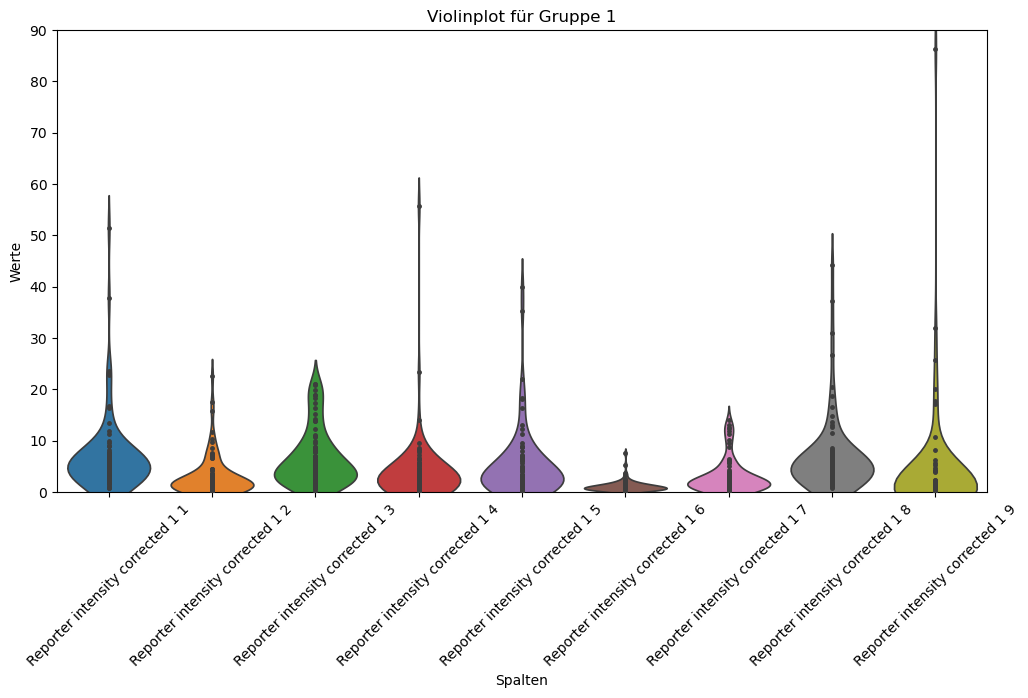

In [33]:
group = '1'  # Gruppe, die wir verwenden möchten
data_for_violinplot = pd.DataFrame()
for col in grouped_columns.get(group, []):
    data_for_violinplot[col] = df_multiplied_filtered[col]

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_for_violinplot, inner="points")
plt.title('Violinplot für Gruppe 1')
plt.xlabel('Spalten')
plt.ylabel('Werte')
plt.ylim(0, 90)  # Einstellen der y-Achsen-Bandbreite auf 0 bis 20
plt.xticks(rotation=45)
plt.show()

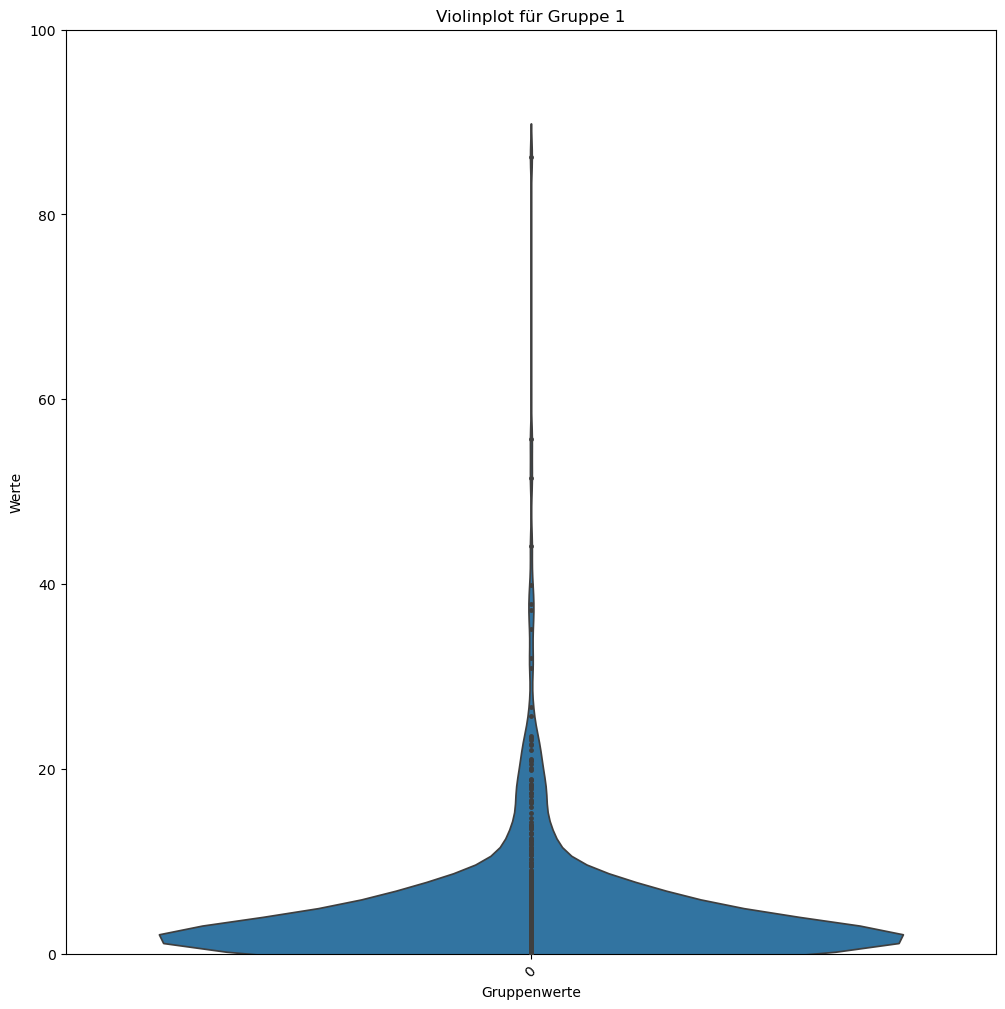

In [34]:
group = '1'

# Daten für die ausgewählte Gruppe sammeln
data_for_violinplot = pd.DataFrame()
for col in grouped_columns.get(group, []):
    data_for_violinplot = pd.concat([data_for_violinplot, df_multiplied_filtered[col]], axis=0)

# Plot erstellen
plt.figure(figsize=(12, 12))
sns.violinplot(data=data_for_violinplot, inner="points")
plt.title(f'Violinplot für Gruppe {group}')
plt.xlabel('Gruppenwerte')
plt.ylabel('Werte')
plt.ylim(0, 100)
plt.xticks(rotation=45)



plt.show()

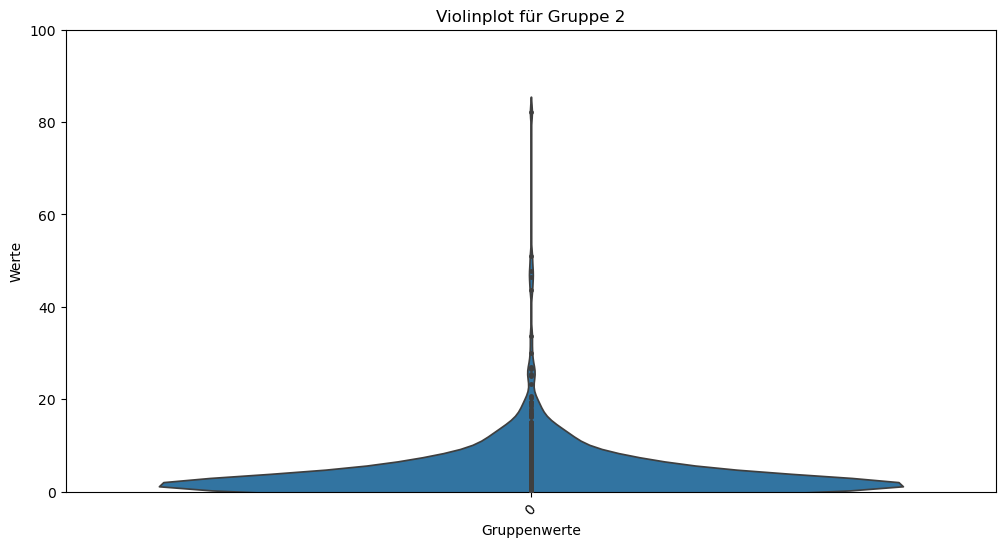

In [35]:
group = '2'

# Daten für die ausgewählte Gruppe sammeln
data_for_violinplot = pd.DataFrame()
for col in grouped_columns.get(group, []):
    data_for_violinplot = pd.concat([data_for_violinplot, df_multiplied_filtered[col]], axis=0)

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_for_violinplot, inner="points")
plt.title(f'Violinplot für Gruppe {group}')
plt.xlabel('Gruppenwerte')
plt.ylabel('Werte')
plt.ylim(0, 100)
plt.xticks(rotation=45)

plt.show()

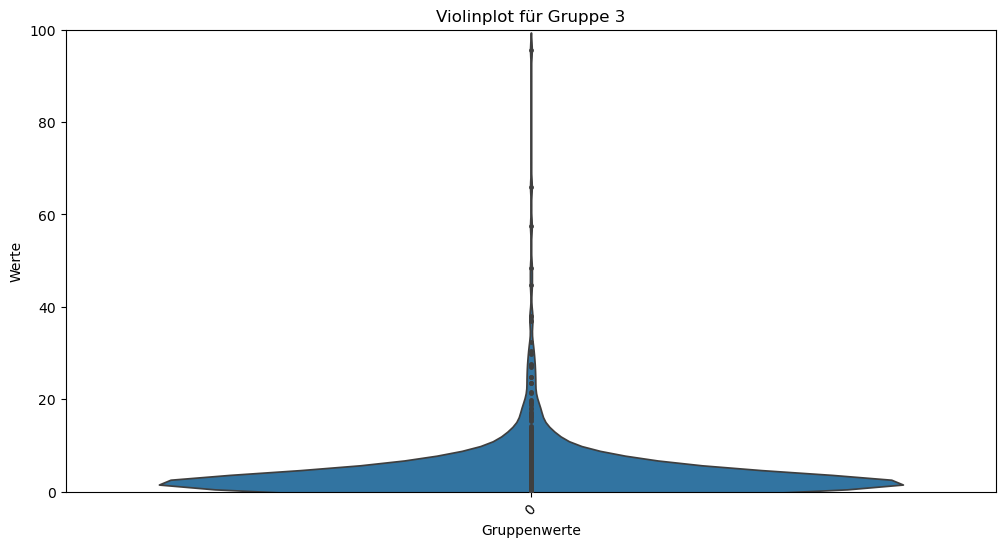

In [36]:
group = '3'

# Daten für die ausgewählte Gruppe sammeln
data_for_violinplot = pd.DataFrame()
for col in grouped_columns.get(group, []):
    data_for_violinplot = pd.concat([data_for_violinplot, df_multiplied_filtered[col]], axis=0)

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_for_violinplot, inner="points")
plt.title(f'Violinplot für Gruppe {group}')
plt.xlabel('Gruppenwerte')
plt.ylabel('Werte')
plt.ylim(0, 100)
plt.xticks(rotation=45)

plt.show()

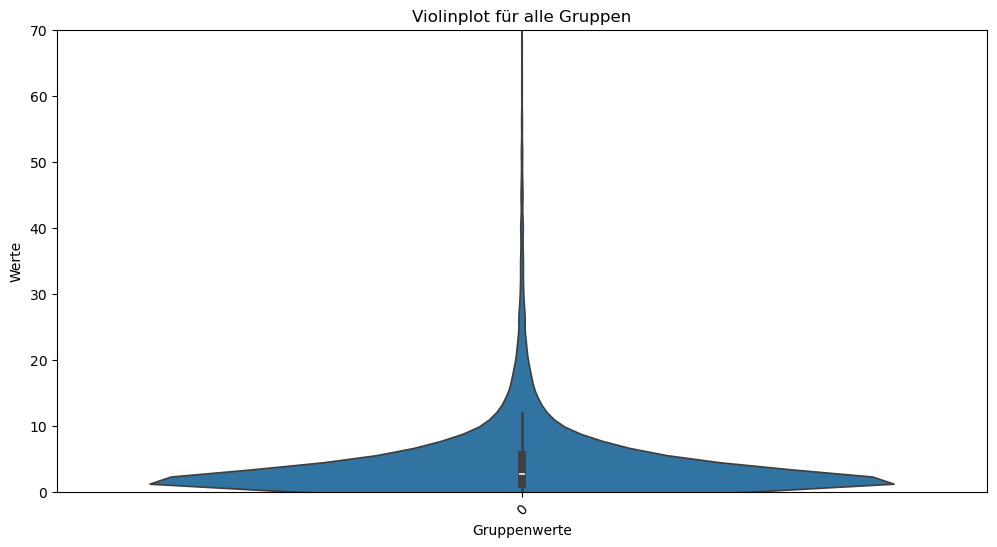

In [37]:
all_data = pd.DataFrame()
for group, columns in grouped_columns.items():
    for col in columns:
        all_data = pd.concat([all_data, df_multiplied_filtered[col]], axis=0)

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_data)
plt.title('Violinplot für alle Gruppen')
plt.xlabel('Gruppenwerte')
plt.ylabel('Werte')
plt.ylim(0, 70)
plt.xticks(rotation=45)



plt.show()

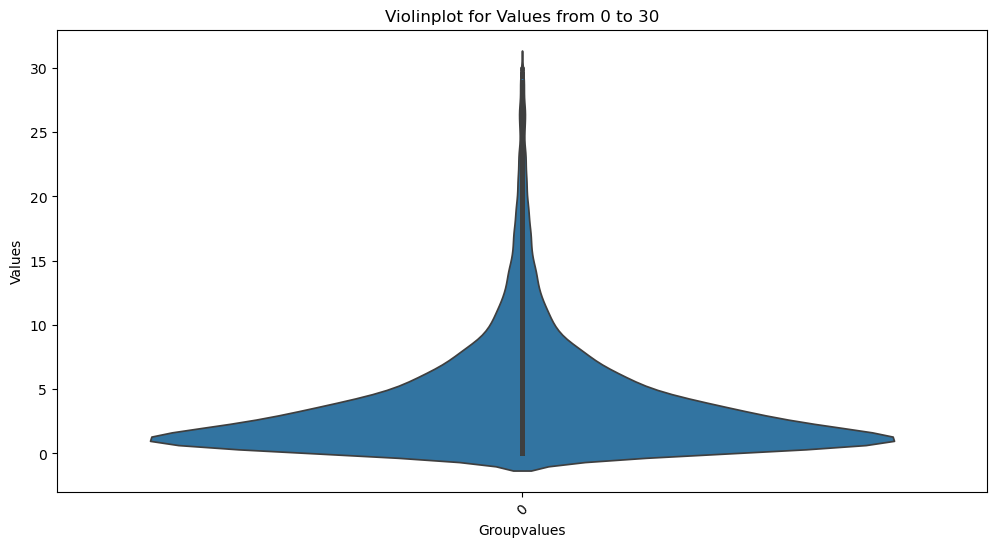

In [38]:
filtered_data = pd.DataFrame()
for group, columns in grouped_columns.items():
    for col in columns:
        data = df_multiplied_filtered[col]
        filtered_data = pd.concat([filtered_data, data[(data >= 0) & (data <= 30)]], axis=0)

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, inner="points")
plt.title('Violinplot for Values from 0 to 30')
plt.xlabel('Groupvalues')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.show()

## 2. Check for batch effects using a dimensionality reduction technique. -> PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA()

pca_result = pca.fit_transform(df_multiplied_filtered)

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)


print("Transformed data (principal components):")
print(pca_result)

Explained variance ratio:
[6.84161216e-01 7.16401183e-02 5.94003623e-02 5.39159681e-02
 2.23093768e-02 2.02395025e-02 1.47560891e-02 1.05489705e-02
 8.20317075e-03 6.64637731e-03 5.71463579e-03 4.97952406e-03
 4.37848989e-03 3.34893779e-03 3.03583677e-03 2.56650061e-03
 2.35238401e-03 2.19458558e-03 1.89921627e-03 1.72084840e-03
 1.33447721e-03 1.25386039e-03 1.16792310e-03 1.03391042e-03
 8.89105198e-04 7.51681194e-04 7.00883500e-04 6.79778006e-04
 6.41671026e-04 6.00246813e-04 5.78776414e-04 5.06588285e-04
 4.46345097e-04 4.04458344e-04 3.79237878e-04 3.69641206e-04
 3.40917197e-04 3.23491122e-04 3.00200308e-04 2.83969403e-04
 2.56883800e-04 2.34774133e-04 2.08846163e-04 2.04135444e-04
 1.97534458e-04 1.79597000e-04 1.61109843e-04 1.49608161e-04
 1.42994443e-04 1.14785175e-04 1.10278292e-04 9.75819924e-05
 9.33896586e-05 8.46339734e-05 7.99146193e-05 7.20988496e-05
 6.54196920e-05 5.72255446e-05 5.59649910e-05 5.29930422e-05
 4.70154822e-05 4.25349029e-05 3.44611805e-05 3.23967253e-0

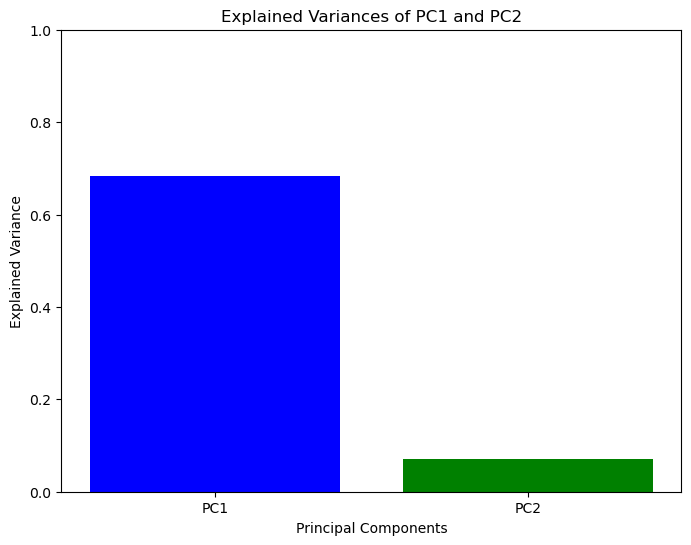

In [40]:
explained_variances = pca.explained_variance_ratio_[:2]

plt.figure(figsize=(8, 6))
plt.bar(x=['PC1', 'PC2'], height=explained_variances, color=['blue', 'green'])
plt.title('Explained Variances of PC1 and PC2')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.ylim(0, 1)
plt.show()

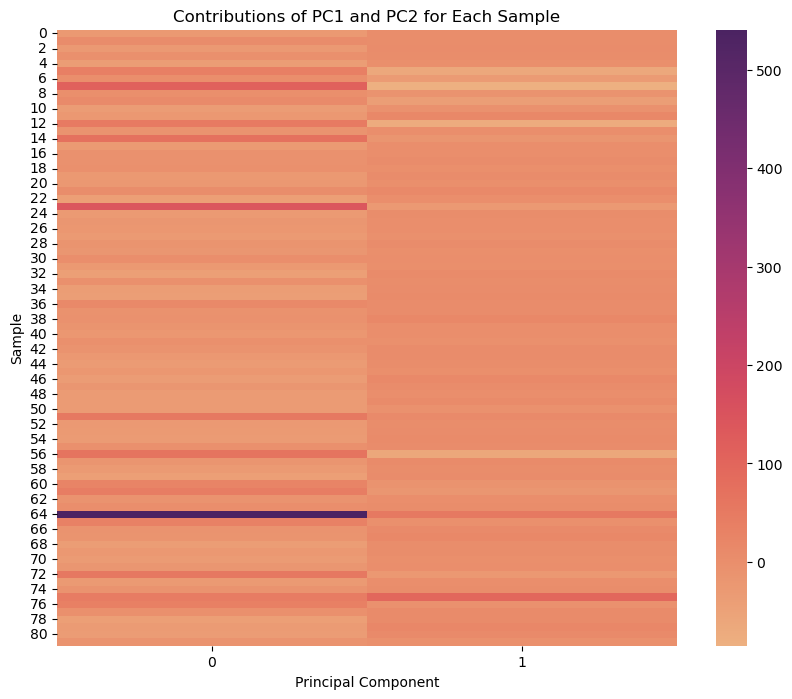

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_result[:, :2], cmap='flare', annot=False, fmt=".2f")
plt.title('Contributions of PC1 and PC2 for Each Sample')
plt.xlabel('Principal Component')
plt.ylabel('Sample')
plt.show()

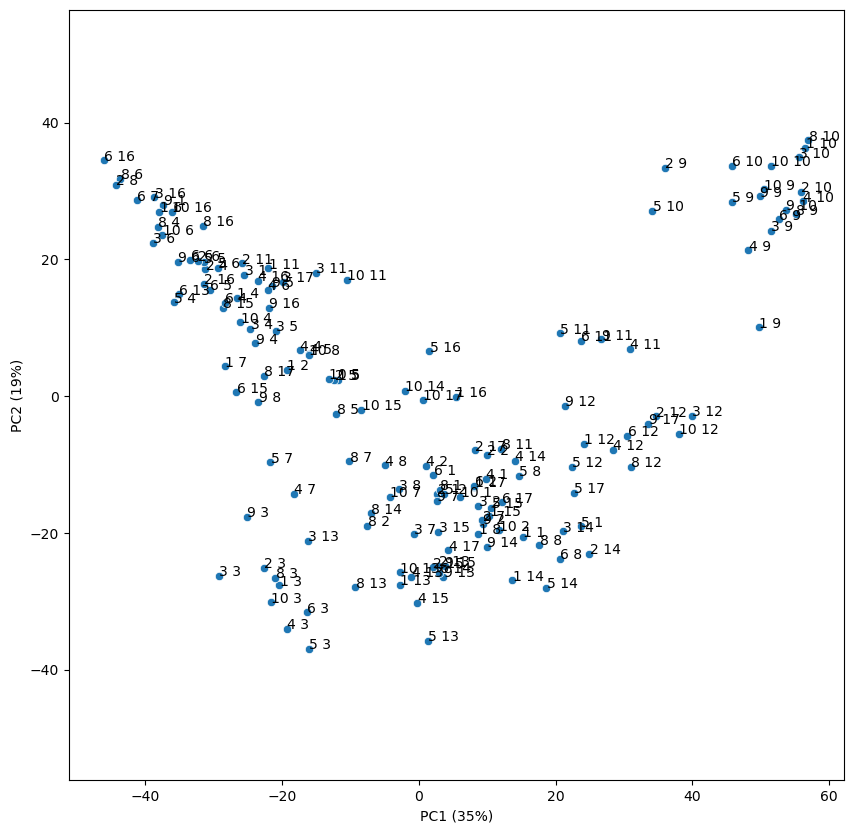

In [42]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(df_multiplied_filtered.T)

#pca = decomposition.PCA(n_components=2)
#pca.fit(df)

#pca.__dict__

pc = pca.transform(df_multiplied_filtered.T)
pc

pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(df_multiplied_filtered.T)
pc

pc_df = pd.DataFrame(
    data=pc,
    columns=['PC1', 'PC2'],
    index=df_multiplied_filtered.columns
)
pc_df

plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=pc_df, x="PC1", y="PC2")
pc_df.apply(lambda x: ax.text(x['PC1']+0.05, x['PC2'], x.name[29:]), axis=1)
plt.xlabel(f'PC1 ({int(pca.explained_variance_ratio_[0]*100)}%)')
plt.ylabel(f'PC2 ({int(pca.explained_variance_ratio_[1]*100)}%)')
plt.axis('equal');

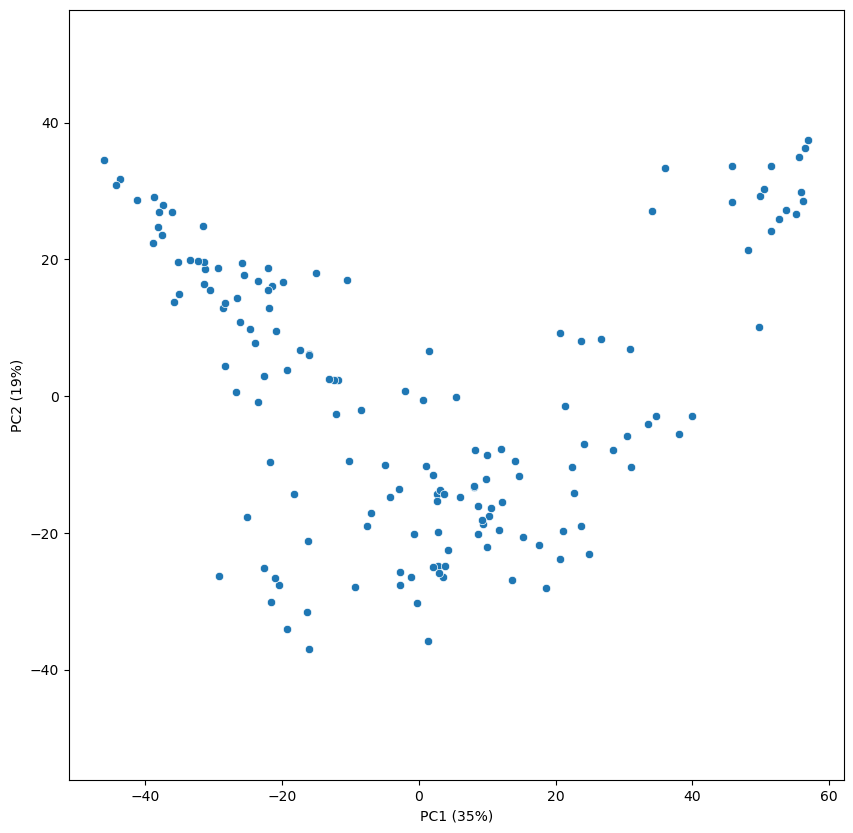

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(df_multiplied_filtered.T)

#pca = decomposition.PCA(n_components=2)
#pca.fit(df)

#pca.__dict__

pc = pca.transform(df_multiplied_filtered.T)
pc

pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(df_multiplied_filtered.T)
pc

pc_df = pd.DataFrame(
    data=pc,
    columns=['PC1', 'PC2'],
    index=df_multiplied_filtered.columns
)
pc_df


plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=pc_df, x="PC1", y="PC2")

plt.xlabel(f'PC1 ({int(pca.explained_variance_ratio_[0]*100)}%)')
plt.ylabel(f'PC2 ({int(pca.explained_variance_ratio_[1]*100)}%)')
plt.axis('equal')
plt.show()

PCA Plot colored by the last number in Reporter intensity corrected.

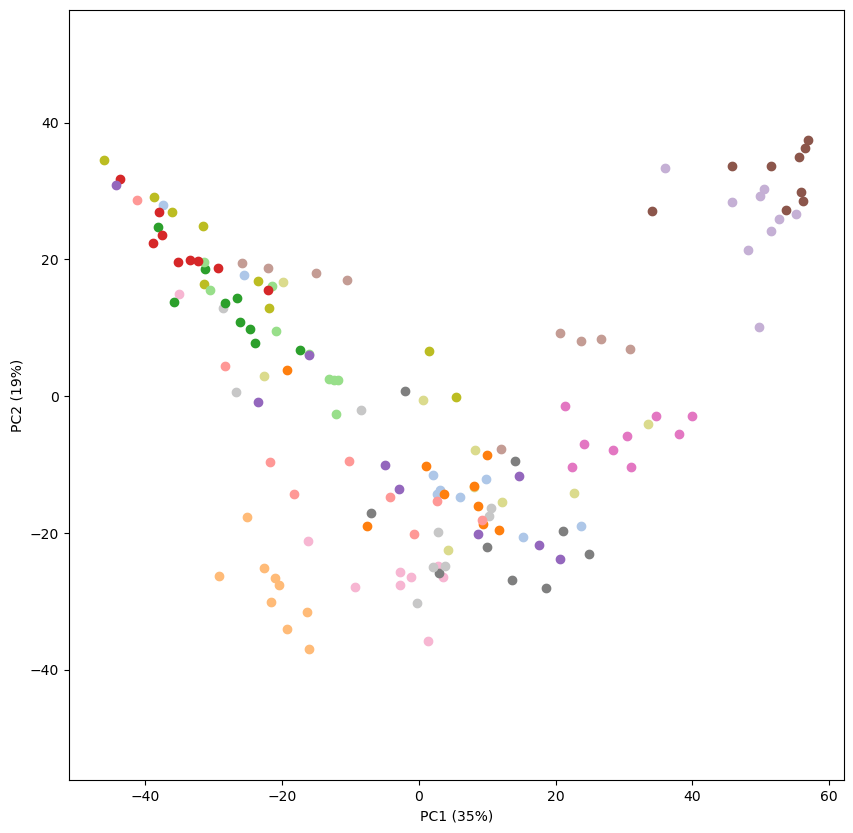

In [44]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=pc_df, x="PC1", y="PC2")

# Erstellung einer Funktion, um Farben basierend auf den letzten zwei Ziffern zuzuweisen
def assign_color(number):
    colors = plt.cm.tab20(np.linspace(0, 1, 20))  # 20 verschiedene Farben aus der Tab20-Farbpalette
    return colors[number % 20]

# Schleife durch die Punkte und Zuweisung der Farben basierend auf den letzten Ziffern
for label, x, y in zip(pc_df.index, pc_df['PC1'], pc_df['PC2']):
    last_two_digits = int(str(label)[-2:])
    color = assign_color(last_two_digits)
    ax.scatter(x, y, color=color)

plt.xlabel(f'PC1 ({int(pca.explained_variance_ratio_[0]*100)}%)')
plt.ylabel(f'PC2 ({int(pca.explained_variance_ratio_[1]*100)}%)')
plt.axis('equal')
plt.show()

Creating a Heatmap loadings of the PCA result.
Here, i used the normalized loadings by subtracting the mean and dividing by the standard deviation before creating the heatmap.
-> the way from the learning-lessons failed!

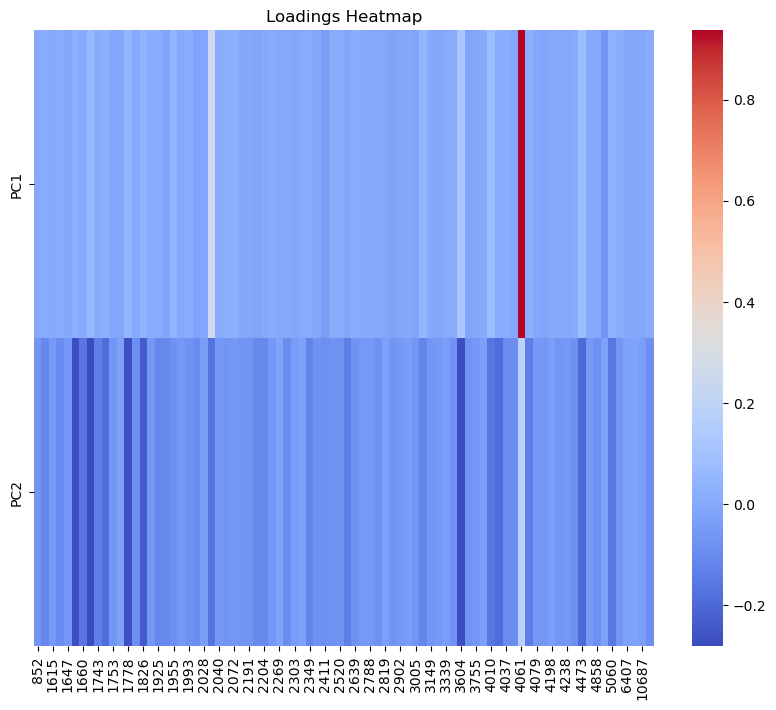

In [45]:
loadings_df = pd.DataFrame(pca.components_, columns=df_multiplied_filtered.index, index=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=False, cmap='coolwarm')
plt.title('Loadings Heatmap')
plt.show()

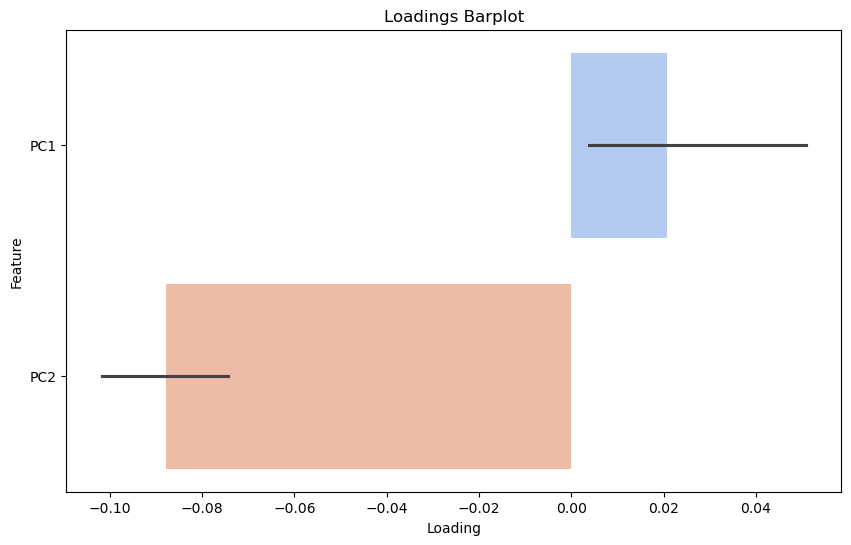

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loadings_df.T, orient='h', palette='coolwarm')
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.title('Loadings Barplot')
plt.show()

In [47]:
max_value = df_multiplied_filtered.max().max()

print(f"Maximaler Wert: {max_value}")

Maximaler Wert: 102.79548723661495


In [48]:
mean_value = df_multiplied_filtered.mean().mean()

print(f"Durchschnittswert: {mean_value}")

Durchschnittswert: 4.616561564645654


## 3. Conduct clustering of the samples to identify any subgroups or clusters of patients that exhibit similar proteomic profiles. -> Clustermap

/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


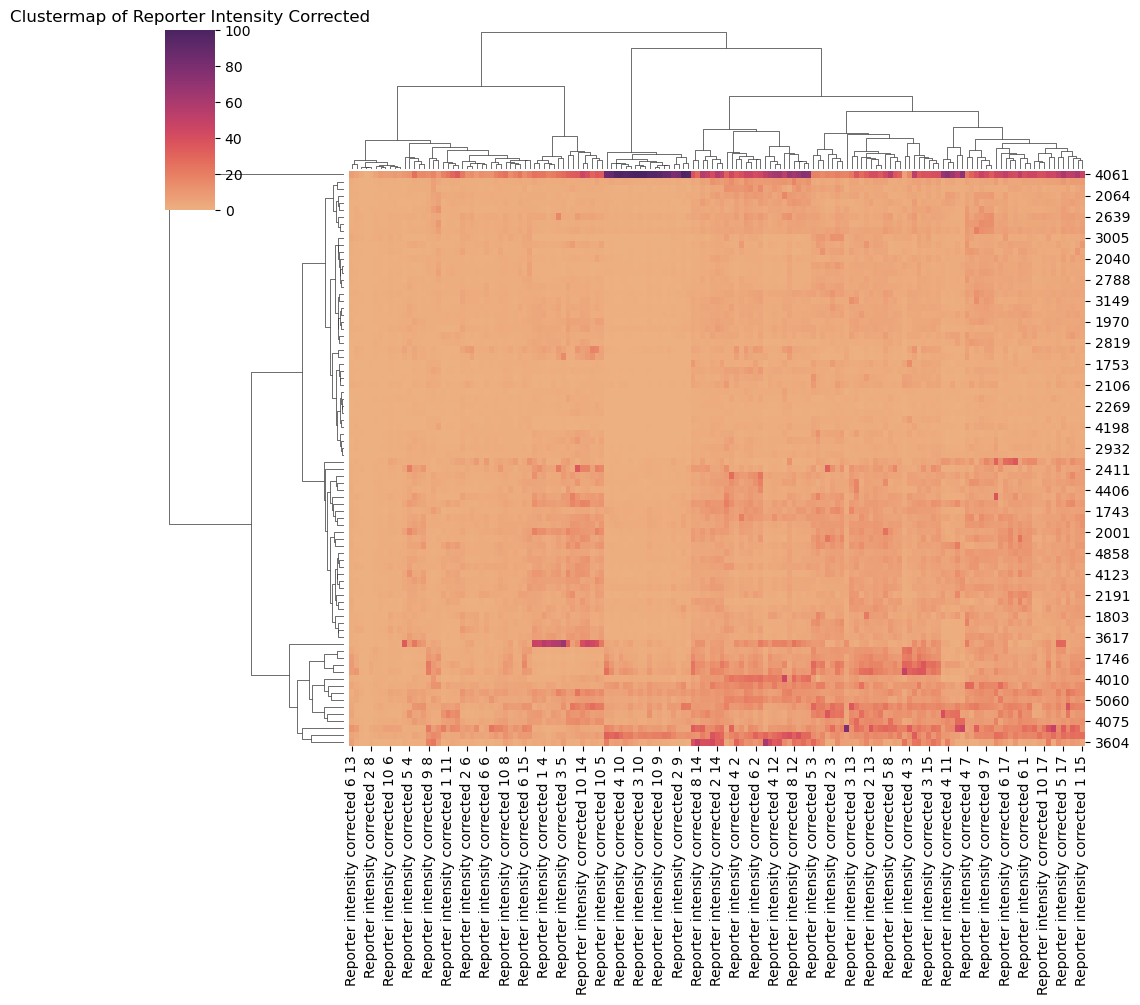

In [49]:
sns.clustermap(df_multiplied_filtered, cmap='flare', method='ward', figsize=(10, 10), vmin=0, vmax=100)
plt.title('Clustermap of Reporter Intensity Corrected')
plt.show()

The upper clustermaps includes all values up to the maximum of ~ 100.
For better visualization i calculated the mean value which is ~ 4,5.
Now, the following clustermap visualizes the values with a maximum of 10.

/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


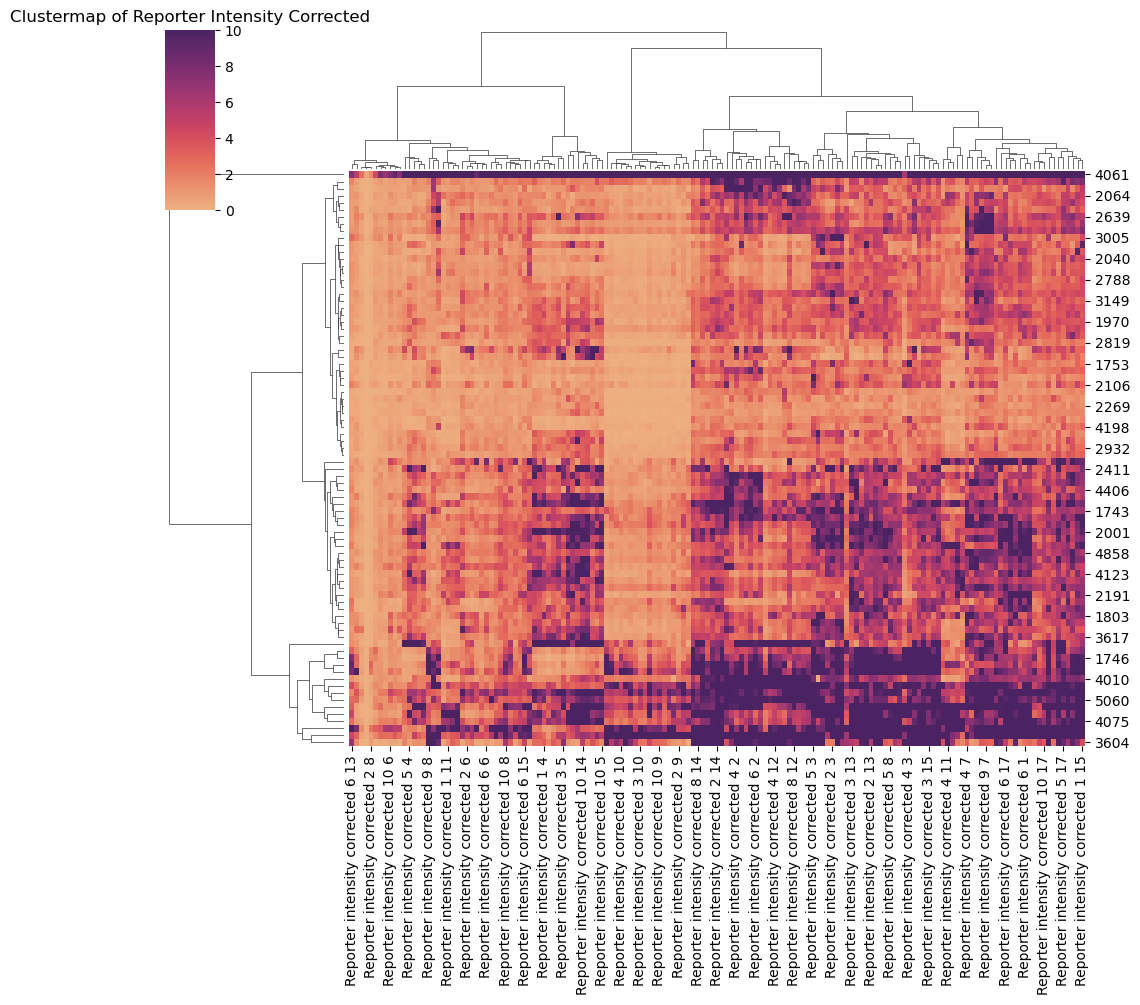

In [50]:
sns.clustermap(df_multiplied_filtered, cmap='flare', method='ward', figsize=(10, 10), vmin=0, vmax=10)
plt.title('Clustermap of Reporter Intensity Corrected')
plt.show()

Now, the following clustermap visualizes the values with a maximum of 5.

/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/ikraminf/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


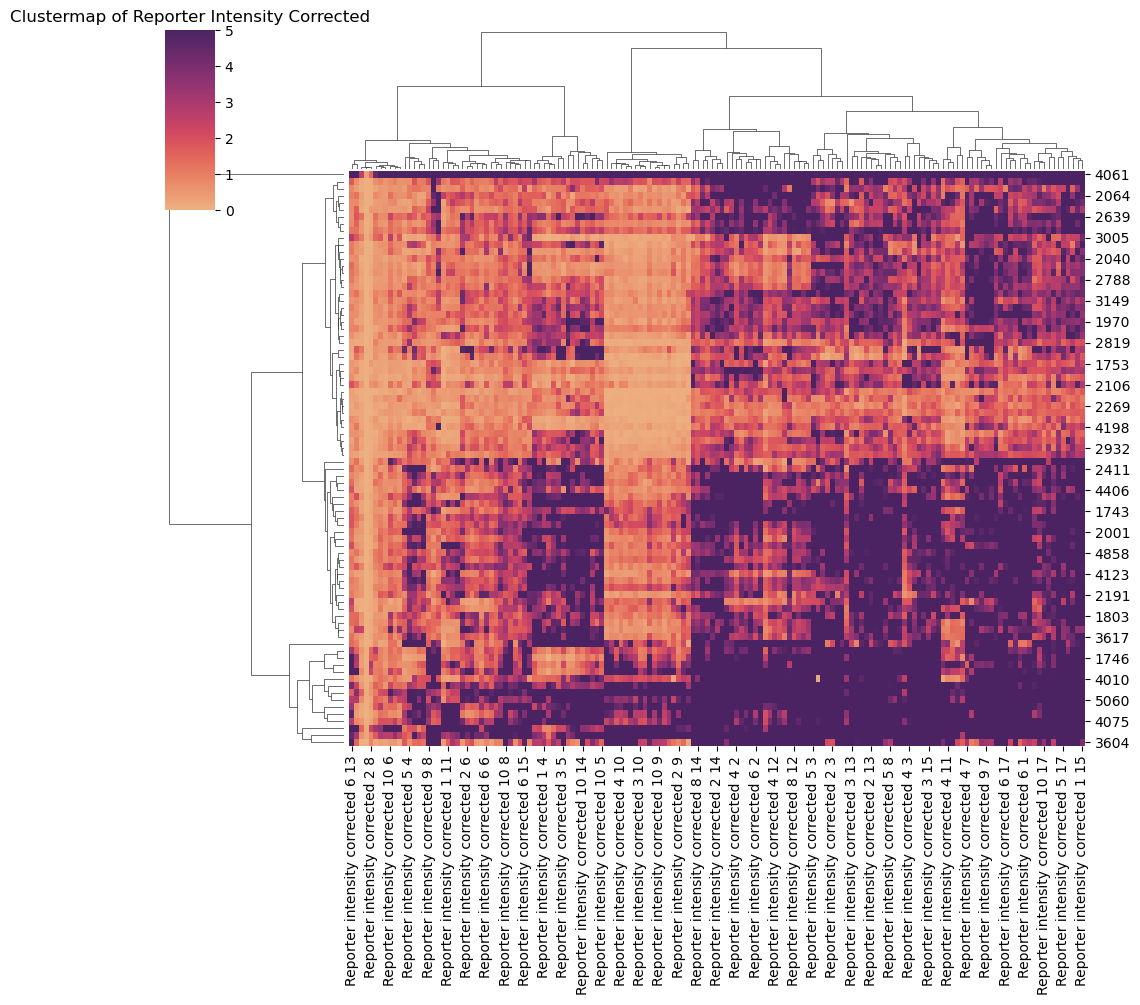

In [51]:
sns.clustermap(df_multiplied_filtered, cmap='flare', method='ward', figsize=(10, 10), vmin=0, vmax=5)
plt.title('Clustermap of Reporter Intensity Corrected')
plt.show()

## 4. Conduct hypothesis testing to identify differentially expressed proteins between two groups, e.g. tumor vs. normal tissue, young vs. old patients. -> t-test

In [52]:
breast_cancer_filtered

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000000,14.575,NaN,NaN,-0.214871,-0.243345,...,-0.115429,-0.035571,-0.030548,-0.036062,-0.033938,-0.031353,-0.035060,-0.031496,-0.032398,-0.031213
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.000000,17.356,NaN,NaN,-0.023948,-0.127078,...,0.208391,-0.034342,-0.030020,-0.035661,-0.032861,-0.030770,-0.034751,-0.030131,-0.031890,-0.030549
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.000000,28.455,NaN,NaN,-0.201914,-0.240115,...,-0.101969,-0.035564,-0.030552,-0.036064,-0.033923,-0.031301,-0.035052,-0.031493,-0.032393,-0.031205
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,20.887,NaN,NaN,-0.081404,-0.132024,...,-0.033753,-0.035354,-0.030489,-0.035796,-0.033822,-0.030612,-0.034883,-0.031137,-0.032275,-0.031031
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.000000,35.168,NaN,NaN,-0.219344,-0.251065,...,-0.078772,-0.035558,-0.030547,-0.036019,-0.033922,-0.031208,-0.035020,-0.031485,-0.032395,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,0.000000,323.310,NaN,NaN,-0.176116,-0.160910,...,-0.069670,-0.035543,-0.030500,-0.035990,-0.033887,-0.031264,-0.034964,-0.031454,-0.032270,-0.031126
11714,Q9Y6Y8;REV__O15068,Q9Y6Y8,SEC23-interacting protein,SEC23IP,0.000000,323.310,NaN,NaN,0.828323,0.435329,...,0.228676,-0.021430,0.000296,-0.010097,-0.010754,-0.015155,0.012531,-0.011564,-0.017843,-0.012532
11715,Q9Y6Y9,Q9Y6Y9,Lymphocyte antigen 96,LY96,0.000000,10.454,NaN,NaN,-0.232271,-0.258803,...,-0.115429,-0.035576,-0.030557,-0.036075,-0.033942,-0.031358,-0.035064,-0.031502,-0.032402,-0.031218
11716,Q9Y6Z7,Q9Y6Z7,Collectin-10,COLEC10,0.000094,5.122,NaN,NaN,-0.225923,-0.252904,...,-0.113413,-0.035573,-0.030551,-0.036070,-0.033939,-0.031355,-0.035063,-0.031499,-0.032398,-0.031215


In [159]:
clinical_data = pd.read_excel('S039_BRCA_propective_clinical_data_r1.xlsx',
                             sheet_name='BRCA_propective_clinical_data',
                             skiprows=7)
clinical_data

/home/ikraminf/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Short-Title,Participant_ID,Event,CRF_Name,CPTAC-Case-ID,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_History_Malignancy,...,HER2_ERBB2_Status_IHC_Positivity_Score,HER2_ERBB2_Status_IHC_Positivity_Other_Scale,HER2_ERBB2_Status_IHC_Positivity_Other_Method_Description,HER2_ERBB2_Status_by_FISH,HER2_ERBB2_Status_FISH_Average_Signals,HER2_ERBB2_Status_FISH_Centromere17_Signals,HER2_ERBB2_Status_FISH_Centromere17_Cell_Counts,HER2_ERBB2_Status_FISH_Centromere17_Ratio,HER2_ERBB2_Status_FISH_Centromere17_Other_Scale,HER2_ERBB2_Status_Positivity_Other_Method_Description
0,NaN,604,NaN,Baseline,604,NaN,NaN,NaN,NaN,NaN,...,0+,Not Available,Not available,Not Amplified,106,92,60,1.15,Not Available,Not Available
1,NaN,604,NaN,Submission,604,492.0,Female,Black or African American,Not Evaluated,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CPTAC-WU-01BR,01BR001,Collection,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Not Applicable,Not Applicable,Not Performed,Not Performed,Not Performed,Not Performed,Not Performed,Not Applicable,Not Applicable
3,CPTAC-WU-01BR,01BR001,Collection,Submission,01BR001,660.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CPTAC-WU-01BR,01BR015,Collection,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,...,1+,Not Applicable,Not Applicable,Not Performed,Not Performed,Not Performed,Not Performed,Not Performed,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,CPTAC-WU-01BR,01BR020,Collection,Submission,01BR020,540.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,CPTAC-WU-01BR,01BR023,Collection,Submission,01BR023,624.0,Female,White,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,CPTAC-WU-01BR,01BR026,Collection,Submission,01BR026,576.0,Female,White,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,CPTAC-BO-21BR,21BR001,Collection,Submission,21BR001,1032.0,Female,White,Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
specimens_df = pd.read_excel('S039_Breast_Cancer_Prospective_Collection_Specimens_r1.xlsx',
                             sheet_name='Sheet1')
specimens_df.rename(columns={'Participant Protocol Identifier : Collection Protocol Registration': 'Participant_ID'}, inplace=True)
specimens_df

/home/ikraminf/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Sample Type,Run order (total),Specimen Label,Participant_ID,TMT experiments,TMT channels
0,Tumor,1,ef52c640-13a9-4855-9ce2-0be77a_D2,11BR047,1,126
1,Tumor,2,6d34d499-167e-42aa-9790-316fca_D2,11BR043,1,127N
2,Tumor,3,2e700669-85b0-43fa-a9c7-3eaf5a_D2,11BR049,1,127C
3,Tumor,4,079b5600-6afc-4785-bb22-48cfab_D2,11BR023,1,128N
4,Tumor,5,0bb9d596-774e-452b-9c89-a6643c_D2,18BR010,1,128C
...,...,...,...,...,...,...
148,Tumor,149,68ef4aa9-00b0-4528-8828-4d3e43_D2,21BR010,17,128C
149,Tumor,150,20506075-36a7-4754-8e5e-628918,09BR001,17,129N
150,Tumor,151,60c8c914-f53d-4f72-a1ce-5fb803,03BR011,17,129C
151,Tumor,152,45b99ac4-0859-4a3d-8b1e-ce5590_D2,11BR036,17,130N


In [161]:
merged_df = clinical_data.merge(specimens_df, on="Participant_ID", how="inner")
merged_df

,Short-Title,Participant_ID,Event,CRF_Name,CPTAC-Case-ID,Participant_Procurement_Age,Participant_Gender,Participant_Race,Participant_Ethnicity,Participant_History_Malignancy,...,HER2_ERBB2_Status_FISH_Centromere17_Signals,HER2_ERBB2_Status_FISH_Centromere17_Cell_Counts,HER2_ERBB2_Status_FISH_Centromere17_Ratio,HER2_ERBB2_Status_FISH_Centromere17_Other_Scale,HER2_ERBB2_Status_Positivity_Other_Method_Description,Sample Type,Run order (total),Specimen Label,TMT experiments,TMT channels
0,CPTAC-WU-01BR,01BR001,Collection,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Performed,Not Performed,Not Performed,Not Applicable,Not Applicable,Tumor,15,17d55745-4ab3-4a80-a182-af938b_D2,2,129N
1,CPTAC-WU-01BR,01BR001,Collection,Submission,01BR001,660.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,15,17d55745-4ab3-4a80-a182-af938b_D2,2,129N
2,CPTAC-WU-01BR,01BR015,Collection,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Performed,Not Performed,Not Performed,Not Applicable,Not Applicable,Tumor,13,42cc89e1-a896-4f57-b8d9-e7fe56_D2,2,128N
3,CPTAC-WU-01BR,01BR015,Collection,Submission,01BR015,420.0,Female,White,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,13,42cc89e1-a896-4f57-b8d9-e7fe56_D2,2,128N
4,CPTAC-WU-01BR,01BR017,Collection,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Performed,Not Performed,Not Performed,Not Applicable,Not Applicable,Tumor,9,09659708-7747-4d59-a3b9-e221e0_D2,1,130C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,CPTAC-WU-01BR,01BR008,Collection,Submission,01BR008,576.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,138,cfa2809f-5468-4457-870c-467c39_D1,16,127C
285,CPTAC-WU-01BR,01BR009,Collection,Submission,01BR009,768.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,137,0ecabbfa-8095-4875-acdb-051582_D1,16,127N
286,CPTAC-WU-01BR,01BR010,Collection,Submission,01BR010,780.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,153,26ecef2d-fcf3-4b85-9647-5e5d29_D1,17,130C
287,CPTAC-WU-01BR,01BR020,Collection,Submission,01BR020,540.0,Female,Black or African American,Not Hispanic or Latino,No,...,NaN,NaN,NaN,NaN,NaN,Tumor,147,3fd68501-514a-4a30-9ce1-2fca26_D1,17,127C


In [104]:
reporter_intensity_groups = {}
for col in breast_cancer_filtered.columns:
    if col.startswith("Reporter intensity corrected"):
        group = col.split('Reporter intensity corrected ')[1].split()[0]
        reporter_intensity_groups.setdefault(group, []).append(col)
        
reporter_intensity_groups

{'1': ['Reporter intensity corrected 1 1',
  'Reporter intensity corrected 1 10',
  'Reporter intensity corrected 1 11',
  'Reporter intensity corrected 1 12',
  'Reporter intensity corrected 1 13',
  'Reporter intensity corrected 1 14',
  'Reporter intensity corrected 1 15',
  'Reporter intensity corrected 1 16',
  'Reporter intensity corrected 1 17',
  'Reporter intensity corrected 1 2',
  'Reporter intensity corrected 1 3',
  'Reporter intensity corrected 1 4',
  'Reporter intensity corrected 1 5',
  'Reporter intensity corrected 1 6',
  'Reporter intensity corrected 1 7',
  'Reporter intensity corrected 1 8',
  'Reporter intensity corrected 1 9'],
 '2': ['Reporter intensity corrected 2 1',
  'Reporter intensity corrected 2 10',
  'Reporter intensity corrected 2 11',
  'Reporter intensity corrected 2 12',
  'Reporter intensity corrected 2 13',
  'Reporter intensity corrected 2 14',
  'Reporter intensity corrected 2 15',
  'Reporter intensity corrected 2 16',
  'Reporter intensity co

In [157]:
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

### Hypothesis Testing between each Reporter Intensity Corrected Groups

H<sub>0</sub>: There is no difference between two reporter intensity corrected groups <br>
H<sub>1</sub>: There is difference between two reporter intensity corrected groups

In [124]:
# Perform the t-test
ttest_dict = {'groupA': [],
              'groupB': [],
              't-statistic': [],
              'p-value': [],
              'conclusion': []}

for pair in combinations(reporter_intensity_groups.keys(), 2):
    groupA = breast_cancer_filtered[reporter_intensity_groups[pair[0]]].mean(axis=1)
    groupB = breast_cancer_filtered[reporter_intensity_groups[pair[1]]].mean(axis=1)
    t_statistic, p_value = ttest_ind(groupA, groupB)
    ttest_dict['groupA'].append(pair[0])
    ttest_dict['groupB'].append(pair[1])
    ttest_dict['t-statistic'].append(t_statistic)
    ttest_dict['p-value'].append(p_value)
    sig = "reject null hypothesis" if p_value < 0.05 else "failing to reject null hypothesis"
    ttest_dict['conclusion'].append(sig)

ttest_df = pd.DataFrame(ttest_dict)
ttest_df

,groupA,groupB,t-statistic,p-value,conclusion
0,1,2,1.562658e-15,1.0,failing to reject null hypothesis
1,1,3,1.847779e-15,1.0,failing to reject null hypothesis
2,1,4,1.031124e-15,1.0,failing to reject null hypothesis
3,1,5,2.034434e-15,1.0,failing to reject null hypothesis
4,1,6,8.037605e-16,1.0,failing to reject null hypothesis
5,1,8,2.109334e-15,1.0,failing to reject null hypothesis
6,1,9,1.042137e-15,1.0,failing to reject null hypothesis
7,1,10,7.599525e-16,1.0,failing to reject null hypothesis
8,2,3,2.623504e-16,1.0,failing to reject null hypothesis
9,2,4,-5.125470e-16,1.0,failing to reject null hypothesis


### Cluster Data into Two Clusters and Hypothesis Testing

In [112]:
from sklearn.cluster import KMeans

In [114]:
columns = [col for col in breast_cancer_filtered.columns if col.startswith("Reporter")]
n_clusters = 2

# Create a KMeans object
kmeans = KMeans(n_clusters=n_clusters)
# Fit the KMeans model to your data
kmeans.fit(breast_cancer_filtered[columns])
# Get cluster labels for each data point
breast_cancer_filtered['labels'] = kmeans.labels_
breast_cancer_filtered

/home/ikraminf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_11020/2545165316.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  breast_cancer_filtered['labels'] = kmeans.labels_


,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9,labels
0,A0A024RBG1,A0A024RBG1,NaN,NUDT4,0.000000,14.575,NaN,NaN,-0.214871,-0.243345,...,-0.035571,-0.030548,-0.036062,-0.033938,-0.031353,-0.035060,-0.031496,-0.032398,-0.031213,0
1,A0A075B6H7,A0A075B6H7,NaN,IGKV3-7,0.000000,17.356,NaN,NaN,-0.023948,-0.127078,...,-0.034342,-0.030020,-0.035661,-0.032861,-0.030770,-0.034751,-0.030131,-0.031890,-0.030549,0
2,A0A075B6H9,A0A075B6H9,NaN,IGLV4-69,0.000000,28.455,NaN,NaN,-0.201914,-0.240115,...,-0.035564,-0.030552,-0.036064,-0.033923,-0.031301,-0.035052,-0.031493,-0.032393,-0.031205,0
3,A0A075B6I0,A0A075B6I0,NaN,IGLV8-61,0.000000,20.887,NaN,NaN,-0.081404,-0.132024,...,-0.035354,-0.030489,-0.035796,-0.033822,-0.030612,-0.034883,-0.031137,-0.032275,-0.031031,0
4,A0A075B6I1,A0A075B6I1,NaN,IGLV4-60,0.000000,35.168,NaN,NaN,-0.219344,-0.251065,...,-0.035558,-0.030547,-0.036019,-0.033922,-0.031208,-0.035020,-0.031485,-0.032395,-0.031189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,Q9Y6Y0,Q9Y6Y0,Influenza virus NS1A-binding protein,IVNS1ABP,0.000000,323.310,NaN,NaN,-0.176116,-0.160910,...,-0.035543,-0.030500,-0.035990,-0.033887,-0.031264,-0.034964,-0.031454,-0.032270,-0.031126,0
11714,Q9Y6Y8;REV__O15068,Q9Y6Y8,SEC23-interacting protein,SEC23IP,0.000000,323.310,NaN,NaN,0.828323,0.435329,...,-0.021430,0.000296,-0.010097,-0.010754,-0.015155,0.012531,-0.011564,-0.017843,-0.012532,0
11715,Q9Y6Y9,Q9Y6Y9,Lymphocyte antigen 96,LY96,0.000000,10.454,NaN,NaN,-0.232271,-0.258803,...,-0.035576,-0.030557,-0.036075,-0.033942,-0.031358,-0.035064,-0.031502,-0.032402,-0.031218,0
11716,Q9Y6Z7,Q9Y6Z7,Collectin-10,COLEC10,0.000094,5.122,NaN,NaN,-0.225923,-0.252904,...,-0.035573,-0.030551,-0.036070,-0.033939,-0.031355,-0.035063,-0.031499,-0.032398,-0.031215,0


In [115]:
breast_cancer_filtered['labels'].value_counts()

labels
0    11188
1        3
Name: count, dtype: int64

In [121]:
X1 = breast_cancer_filtered[breast_cancer_filtered['labels'] == 0][columns].mean(axis=1)
X2 = breast_cancer_filtered[breast_cancer_filtered['labels'] == 1][columns].mean(axis=1)

H<sub>0</sub>: There is no difference in the mean expression levels of the proteins between the two groups X1 & X2 <br>
H<sub>1</sub>: There is difference in the mean expression levels of the proteins between the two groups X1 & X2

In [122]:
t_statistic, p_value = ttest_ind(X1, X2)
# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -97.84895753581712
P-value: 0.0


As, p_value 0.0 < 0.05 and t_statistic is high, we can reject the null hypothesis. So, there are significant difference between the two groups.

### Differential Expression Analysis between Reporter Intensity Corrected Group1 and Group2

In [135]:
def ttest(row, groupA, groupB):
    """
    This will return the p-value for two-sided t-test between two groups
    """
    t, p = ttest_ind(row[groupA], row[groupB])
    return p

In [129]:
groupA = reporter_intensity_groups['1']
groupB = reporter_intensity_groups['2']

X = pd.concat([breast_cancer_filtered['Majority protein IDs'],
               breast_cancer_filtered[groupA],
               breast_cancer_filtered[groupB]], axis=1)
X.set_index('Majority protein IDs', inplace=True)
X

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 2 16,Reporter intensity corrected 2 17,Reporter intensity corrected 2 2,Reporter intensity corrected 2 3,Reporter intensity corrected 2 4,Reporter intensity corrected 2 5,Reporter intensity corrected 2 6,Reporter intensity corrected 2 7,Reporter intensity corrected 2 8,Reporter intensity corrected 2 9
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.062783,-0.160049,-0.162652,-0.265159,-0.190063,-0.327324,-0.075234,-0.261909,-0.022522,-0.030548
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,0.165826,1.117271,2.433293,2.163400,-0.189780,-0.260522,0.015014,0.200114,0.017404,-0.030020
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.056949,-0.153477,-0.163258,0.023665,-0.184918,-0.276625,-0.076128,-0.264623,-0.019164,-0.030552
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,0.038697,0.061927,-0.147524,-0.244395,-0.188067,0.309408,-0.076552,-0.171448,0.005515,-0.030489
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.060801,-0.137591,-0.172395,-0.263695,-0.188660,-0.298709,-0.072291,-0.258751,-0.017642,-0.030547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.047803,-0.131320,-0.144758,-0.175129,0.567632,-0.124765,-0.068449,-0.256738,-0.018546,-0.030500
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.022719,0.197040,0.570341,0.265772,1.498170,0.542997,0.078096,0.440943,0.002663,0.000296
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.063736,-0.171613,-0.176671,-0.265159,-0.190063,-0.327324,-0.080311,-0.295310,-0.022522,-0.030557


In [142]:
X['p-value'] = X.apply(ttest, args=(groupA, groupB), axis=1)
X

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 2 17,Reporter intensity corrected 2 2,Reporter intensity corrected 2 3,Reporter intensity corrected 2 4,Reporter intensity corrected 2 5,Reporter intensity corrected 2 6,Reporter intensity corrected 2 7,Reporter intensity corrected 2 8,Reporter intensity corrected 2 9,p-value
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.160049,-0.162652,-0.265159,-0.190063,-0.327324,-0.075234,-0.261909,-0.022522,-0.030548,0.946338
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,1.117271,2.433293,2.163400,-0.189780,-0.260522,0.015014,0.200114,0.017404,-0.030020,0.901313
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.153477,-0.163258,0.023665,-0.184918,-0.276625,-0.076128,-0.264623,-0.019164,-0.030552,0.535733
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,0.061927,-0.147524,-0.244395,-0.188067,0.309408,-0.076552,-0.171448,0.005515,-0.030489,0.406461
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.137591,-0.172395,-0.263695,-0.188660,-0.298709,-0.072291,-0.258751,-0.017642,-0.030547,0.986541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.131320,-0.144758,-0.175129,0.567632,-0.124765,-0.068449,-0.256738,-0.018546,-0.030500,0.753402
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.197040,0.570341,0.265772,1.498170,0.542997,0.078096,0.440943,0.002663,0.000296,0.845881
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.171613,-0.176671,-0.265159,-0.190063,-0.327324,-0.080311,-0.295310,-0.022522,-0.030557,0.979213


In [144]:
X['log2FC'] = np.log2((X[groupA].mean(axis=1) / X[groupB].mean(axis=1)))
X

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 2 2,Reporter intensity corrected 2 3,Reporter intensity corrected 2 4,Reporter intensity corrected 2 5,Reporter intensity corrected 2 6,Reporter intensity corrected 2 7,Reporter intensity corrected 2 8,Reporter intensity corrected 2 9,p-value,log2FC
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.162652,-0.265159,-0.190063,-0.327324,-0.075234,-0.261909,-0.022522,-0.030548,0.946338,0.018869
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,2.433293,2.163400,-0.189780,-0.260522,0.015014,0.200114,0.017404,-0.030020,0.901313,-0.150719
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.163258,0.023665,-0.184918,-0.276625,-0.076128,-0.264623,-0.019164,-0.030552,0.535733,0.184544
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,-0.147524,-0.244395,-0.188067,0.309408,-0.076552,-0.171448,0.005515,-0.030489,0.406461,0.798078
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.172395,-0.263695,-0.188660,-0.298709,-0.072291,-0.258751,-0.017642,-0.030547,0.986541,0.004741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.144758,-0.175129,0.567632,-0.124765,-0.068449,-0.256738,-0.018546,-0.030500,0.753402,-0.645939
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.570341,0.265772,1.498170,0.542997,0.078096,0.440943,0.002663,0.000296,0.845881,0.096350
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.176671,-0.265159,-0.190063,-0.327324,-0.080311,-0.295310,-0.022522,-0.030557,0.979213,0.007124


In [145]:
# add adjusted p value to a new column named padj
X["padj"] = multipletests(X["p-value"], method = "fdr_bh")[1]
X

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 2 3,Reporter intensity corrected 2 4,Reporter intensity corrected 2 5,Reporter intensity corrected 2 6,Reporter intensity corrected 2 7,Reporter intensity corrected 2 8,Reporter intensity corrected 2 9,p-value,log2FC,padj
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.265159,-0.190063,-0.327324,-0.075234,-0.261909,-0.022522,-0.030548,0.946338,0.018869,0.999992
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,2.163400,-0.189780,-0.260522,0.015014,0.200114,0.017404,-0.030020,0.901313,-0.150719,0.999992
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,0.023665,-0.184918,-0.276625,-0.076128,-0.264623,-0.019164,-0.030552,0.535733,0.184544,0.999992
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,-0.244395,-0.188067,0.309408,-0.076552,-0.171448,0.005515,-0.030489,0.406461,0.798078,0.999992
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.263695,-0.188660,-0.298709,-0.072291,-0.258751,-0.017642,-0.030547,0.986541,0.004741,0.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.175129,0.567632,-0.124765,-0.068449,-0.256738,-0.018546,-0.030500,0.753402,-0.645939,0.999992
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.265772,1.498170,0.542997,0.078096,0.440943,0.002663,0.000296,0.845881,0.096350,0.999992
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.265159,-0.190063,-0.327324,-0.080311,-0.295310,-0.022522,-0.030557,0.979213,0.007124,0.999992


In [158]:
differentially_expressed_df = X[X['p-value'] < 0.05]
differentially_expressed_df

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 2 3,Reporter intensity corrected 2 4,Reporter intensity corrected 2 5,Reporter intensity corrected 2 6,Reporter intensity corrected 2 7,Reporter intensity corrected 2 8,Reporter intensity corrected 2 9,p-value,log2FC,padj
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
P01889,0.051331,-0.023109,-0.013020,-0.078365,0.072950,-0.043301,-0.088579,0.150519,-0.050579,-0.050442,...,0.182589,-0.113583,-0.049973,-0.040711,0.146613,-0.017795,-0.029428,0.048321,NaN,0.999992
P08575,-0.010306,-0.022603,-0.020087,-0.022498,-0.029656,0.002494,-0.081190,-0.006873,0.008461,-0.020058,...,-0.139273,-0.028647,0.419278,-0.032432,1.282504,-0.007029,-0.029928,0.047123,NaN,0.999992
P16885,-0.028888,-0.022721,0.007016,-0.007823,-0.032676,0.015670,-0.012136,-0.033878,0.019698,0.029487,...,0.171075,-0.132362,0.147996,-0.004033,0.388774,-0.012952,-0.029500,0.011577,NaN,0.999992
P23368,0.196420,-0.009000,0.476917,0.341883,0.181851,0.508868,0.367895,0.376381,0.371653,0.035475,...,0.923032,0.395187,0.535774,0.172306,0.966051,-0.010119,-0.020956,0.026077,-0.974670,0.999992
P28065,-0.146144,-0.023813,-0.028350,-0.082790,-0.133441,-0.117522,-0.145170,-0.056182,-0.132707,-0.045125,...,-0.069538,-0.172100,0.076173,-0.034708,0.284105,-0.018332,-0.030147,0.038445,1.802650,0.999992
P29466,0.013344,-0.022542,0.008901,0.020844,0.046504,0.022987,-0.021668,-0.053724,-0.107335,-0.025042,...,0.087659,-0.092065,0.109129,-0.037920,0.368379,-0.012075,-0.028646,0.020865,NaN,0.999992
P40306,-0.063071,-0.022553,0.076301,0.075711,0.055200,-0.025962,-0.066639,0.033355,-0.088639,0.068325,...,0.158500,-0.068118,0.063845,-0.031373,0.114847,-0.017147,-0.030228,0.009565,NaN,0.999992
P42224,1.070185,0.030816,0.281960,0.473994,1.175988,0.463899,0.516026,2.142650,0.805392,0.101308,...,1.046883,0.083340,2.121724,0.346725,4.321466,0.006208,-0.012132,0.046835,-1.320935,0.999992
P42768,-0.166974,-0.024024,-0.043545,-0.032786,-0.179167,-0.107514,-0.168034,-0.099741,-0.157696,-0.050764,...,-0.179924,-0.171001,0.012435,-0.033341,0.145247,-0.017854,-0.030097,0.042828,1.082719,0.999992


## 5. Conduct enrichment analysis to identify biological pathways and GO terms that are enriched for the differentially expressed proteins. -> g:Profiler

In [162]:
from gprofiler import gprofiler

In [166]:
differentially_expressed_genes = breast_cancer_filtered[breast_cancer_filtered['Majority protein IDs'].isin(differentially_expressed_df.index)]['Gene names']
differentially_expressed_genes.to_list()

['HLA-B',
 'PTPRC',
 'PLCG2',
 'ME2',
 'PSMB9',
 'CASP1',
 'PSMB10',
 'STAT1',
 'WAS',
 'CD97',
 'PRELP',
 'HMGN5',
 'PKN1',
 'RCSD1',
 'ANKRD44',
 'MZB1',
 'SEPT1',
 'DOCK2',
 'ISG20',
 'GBP5',
 'GBP4',
 'FNBP1',
 'PRKD2',
 'BIN2',
 'CGGBP1']

In [167]:
enrichment = gprofiler(differentially_expressed_genes.to_list(), organism='hsapiens')
enrichment.sort_values("p.value")

,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
GO:0006955,1,True,0.000117,2165,25,14,0.560,0.006,GO:0006955,BP,2,immune response,1,"WAS,PTPRC,PRKD2,STAT1,PKN1,CD97,DOCK2,CASP1,GB..."
GO:0002376,1,True,0.000124,3044,25,16,0.640,0.005,GO:0002376,BP,2,immune system process,1,"WAS,PTPRC,PRKD2,STAT1,PKN1,CD97,DOCK2,CASP1,GB..."
GO:0071346,1,True,0.000139,172,25,6,0.240,0.035,GO:0071346,BP,2,cellular response to interferon-gamma,2,"WAS,STAT1,CASP1,GBP5,GBP4,HLA-B"
GO:0034341,1,True,0.000266,192,25,6,0.240,0.031,GO:0034341,BP,2,response to interferon-gamma,1,"WAS,STAT1,CASP1,GBP5,GBP4,HLA-B"
TF:M04788_0,1,True,0.000390,548,25,8,0.320,0.015,TF:M04788_0,tf,10,Factor: IRF-1; motif: STTTCACTTTCNNT; matc...,2,"ME2,PRKD2,CASP1,GBP4,ISG20,PRELP,HLA-B,PSMB9"
TF:M04788,1,True,0.000390,548,25,8,0.320,0.015,TF:M04788,tf,10,Factor: IRF-1; motif: STTTCACTTTCNNT,1,"ME2,PRKD2,CASP1,GBP4,ISG20,PRELP,HLA-B,PSMB9"
REAC:R-HSA-168256,1,True,0.000393,2019,18,13,0.722,0.006,REAC:R-HSA-168256,rea,1,Immune System,1,"WAS,PTPRC,STAT1,CD97,DOCK2,CASP1,GBP5,GBP4,ISG..."
KEGG:04666,1,True,0.001550,90,15,4,0.267,0.044,KEGG:04666,keg,5,Fc gamma R-mediated phagocytosis,1,"WAS,PTPRC,DOCK2,PLCG2"
REAC:R-HSA-1280215,1,True,0.002070,687,18,8,0.444,0.012,REAC:R-HSA-1280215,rea,1,Cytokine Signaling in Immune system,2,"STAT1,CASP1,GBP5,GBP4,ISG20,PSMB10,HLA-B,PSMB9"


## 6. Conduct advanced hypothesis testing to identify proteins that are differentially expressed for a metadata annotation with >2 categories, e.g. cancer subtype, smoking history, different age ranges. -> ANOVA

In [148]:
from scipy import stats

H0: There is no difference among the reporter intensity corrected groups <br>
H1: There is difference among the reporter intensity corrected groups

In [151]:
def anova(row, group1, group2, group3, group4, group5, group6, group8, group9, group10):
    """
    This will return the p-value for two-sided t-test between two groups
    """
    f_statistic, p_value = stats.f_oneway(row[group1],
                                          row[group2],
                                          row[group3],
                                          row[group4],
                                          row[group5],
                                          row[group6],
                                          row[group8],
                                          row[group9],
                                          row[group10])
    return p_value

In [149]:
reporter_intensity_groups.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '8', '9', '10'])

In [170]:
group1 = reporter_intensity_groups['1']
group2 = reporter_intensity_groups['2']
group3 = reporter_intensity_groups['3']
group4 = reporter_intensity_groups['4']
group5 = reporter_intensity_groups['5']
group6 = reporter_intensity_groups['6']
group8 = reporter_intensity_groups['8']
group9 = reporter_intensity_groups['9']
group10 = reporter_intensity_groups['10']

anova_df = pd.concat([breast_cancer_filtered['Majority protein IDs'],
               breast_cancer_filtered[group1],
               breast_cancer_filtered[group2],
               breast_cancer_filtered[group3],
               breast_cancer_filtered[group4],
               breast_cancer_filtered[group5],
               breast_cancer_filtered[group6],
               breast_cancer_filtered[group8],
               breast_cancer_filtered[group9],
               breast_cancer_filtered[group10]], axis=1)

anova_df.set_index('Majority protein IDs', inplace=True)
anova_df

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 10 16,Reporter intensity corrected 10 17,Reporter intensity corrected 10 2,Reporter intensity corrected 10 3,Reporter intensity corrected 10 4,Reporter intensity corrected 10 5,Reporter intensity corrected 10 6,Reporter intensity corrected 10 7,Reporter intensity corrected 10 8,Reporter intensity corrected 10 9
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.045524,-0.150238,-0.194096,-0.290808,-0.246275,-0.289161,-0.066654,-0.223530,-0.115429,-0.031213
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,0.013386,0.215409,6.986320,2.381838,-0.245252,-0.251288,-0.015799,0.243479,0.208391,-0.030549
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.040387,-0.131195,-0.133815,-0.187224,-0.234700,-0.283426,-0.065648,-0.214703,-0.101969,-0.031205
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,-0.019165,-0.089020,-0.182953,-0.258357,-0.230916,0.265992,-0.066651,-0.149890,-0.033753,-0.031031
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.043761,-0.140575,-0.202488,-0.287943,-0.242401,-0.253853,-0.058046,-0.229787,-0.078772,-0.031189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.031936,-0.117664,-0.174980,-0.159026,0.535878,-0.009540,-0.057153,-0.217462,-0.069670,-0.031126
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.040126,0.163384,0.654530,0.551386,0.948352,0.391541,0.062772,0.330862,0.228676,-0.012532
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.046930,-0.162994,-0.214594,-0.290808,-0.246275,-0.289161,-0.069910,-0.251514,-0.115429,-0.031218


In [171]:
anova_df['p-value'] = anova_df.apply(anova,
                                     args=(group1, group2, group3, group4, group5, group6, group8, group9, group10),
                                     axis=1)
anova_df

/tmp/ipykernel_11020/727707458.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anova_df['p-value'] = anova_df.apply(anova,


,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 10 17,Reporter intensity corrected 10 2,Reporter intensity corrected 10 3,Reporter intensity corrected 10 4,Reporter intensity corrected 10 5,Reporter intensity corrected 10 6,Reporter intensity corrected 10 7,Reporter intensity corrected 10 8,Reporter intensity corrected 10 9,p-value
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.150238,-0.194096,-0.290808,-0.246275,-0.289161,-0.066654,-0.223530,-0.115429,-0.031213,0.958736
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,0.215409,6.986320,2.381838,-0.245252,-0.251288,-0.015799,0.243479,0.208391,-0.030549,0.702353
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.131195,-0.133815,-0.187224,-0.234700,-0.283426,-0.065648,-0.214703,-0.101969,-0.031205,0.545797
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,-0.089020,-0.182953,-0.258357,-0.230916,0.265992,-0.066651,-0.149890,-0.033753,-0.031031,0.977465
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.140575,-0.202488,-0.287943,-0.242401,-0.253853,-0.058046,-0.229787,-0.078772,-0.031189,0.950708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.117664,-0.174980,-0.159026,0.535878,-0.009540,-0.057153,-0.217462,-0.069670,-0.031126,0.995807
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.163384,0.654530,0.551386,0.948352,0.391541,0.062772,0.330862,0.228676,-0.012532,0.971354
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.162994,-0.214594,-0.290808,-0.246275,-0.289161,-0.069910,-0.251514,-0.115429,-0.031218,0.961901


In [172]:
# add adjusted p value to a new column named padj
anova_df["padj"] = multipletests(anova_df["p-value"], method = "fdr_bh")[1]
anova_df

/tmp/ipykernel_11020/2870926459.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anova_df["padj"] = multipletests(anova_df["p-value"], method = "fdr_bh")[1]


,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 10 2,Reporter intensity corrected 10 3,Reporter intensity corrected 10 4,Reporter intensity corrected 10 5,Reporter intensity corrected 10 6,Reporter intensity corrected 10 7,Reporter intensity corrected 10 8,Reporter intensity corrected 10 9,p-value,padj
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1,-0.214871,-0.024484,-0.097262,-0.111915,-0.255852,-0.192192,-0.239712,-0.140594,-0.202283,-0.088679,...,-0.194096,-0.290808,-0.246275,-0.289161,-0.066654,-0.223530,-0.115429,-0.031213,0.958736,0.999999
A0A075B6H7,-0.023948,-0.023587,3.606061,0.133879,0.038349,0.118232,-0.046741,0.134107,0.091478,4.908168,...,6.986320,2.381838,-0.245252,-0.251288,-0.015799,0.243479,0.208391,-0.030549,0.702353,0.999999
A0A075B6H9,-0.201914,-0.024478,-0.106008,-0.109182,-0.227981,-0.185357,-0.227482,-0.121085,-0.203666,-0.073764,...,-0.133815,-0.187224,-0.234700,-0.283426,-0.065648,-0.214703,-0.101969,-0.031205,0.545797,0.999999
A0A075B6I0,-0.081404,-0.024339,-0.076938,-0.076891,-0.238028,-0.164429,-0.056964,-0.079848,-0.121692,-0.091212,...,-0.182953,-0.258357,-0.230916,0.265992,-0.066651,-0.149890,-0.033753,-0.031031,0.977465,0.999999
A0A075B6I1,-0.219344,-0.024485,-0.060091,-0.119681,-0.208489,-0.187153,-0.208139,-0.136032,-0.201579,-0.096294,...,-0.202488,-0.287943,-0.242401,-0.253853,-0.058046,-0.229787,-0.078772,-0.031189,0.950708,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y6Y0,-0.176116,-0.024270,-0.072841,-0.115796,-0.156132,-0.120035,-0.179010,-0.072001,-0.193610,-0.090223,...,-0.174980,-0.159026,0.535878,-0.009540,-0.057153,-0.217462,-0.069670,-0.031126,0.995807,0.999999
Q9Y6Y8,0.828323,-0.011081,0.113344,0.321855,0.936450,0.353763,0.442415,0.214492,0.286753,0.176399,...,0.654530,0.551386,0.948352,0.391541,0.062772,0.330862,0.228676,-0.012532,0.971354,0.999999
Q9Y6Y9,-0.232271,-0.024487,-0.107425,-0.128241,-0.261770,-0.192192,-0.239712,-0.154196,-0.227319,-0.100015,...,-0.214594,-0.290808,-0.246275,-0.289161,-0.069910,-0.251514,-0.115429,-0.031218,0.961901,0.999999


In [173]:
differentially_expressed_df = anova_df[anova_df['p-value'] < 0.05]
differentially_expressed_df

,Reporter intensity corrected 1 1,Reporter intensity corrected 1 10,Reporter intensity corrected 1 11,Reporter intensity corrected 1 12,Reporter intensity corrected 1 13,Reporter intensity corrected 1 14,Reporter intensity corrected 1 15,Reporter intensity corrected 1 16,Reporter intensity corrected 1 17,Reporter intensity corrected 1 2,...,Reporter intensity corrected 10 2,Reporter intensity corrected 10 3,Reporter intensity corrected 10 4,Reporter intensity corrected 10 5,Reporter intensity corrected 10 6,Reporter intensity corrected 10 7,Reporter intensity corrected 10 8,Reporter intensity corrected 10 9,p-value,padj
Majority protein IDs,,,,,,,,,,,,,,,,,,,,,
P04181,0.260381,-0.018225,0.117858,0.056967,0.043100,0.193678,0.199739,0.090696,0.075134,0.058586,...,0.171820,0.126112,0.015172,0.083267,0.101643,0.128956,0.060063,-0.023625,0.038913,0.999999
P04626,-0.054535,-0.023677,0.055350,-0.076506,-0.023944,-0.041957,-0.054587,1.500596,0.125398,0.001826,...,0.124387,0.500533,0.257056,0.652998,0.031556,0.194658,0.263350,-0.027581,0.007749,0.999999
P05060,-0.080423,-0.024265,-0.034187,-0.073650,-0.130956,-0.112475,-0.102762,-0.068214,-0.083879,-0.076888,...,4.539820,6.316884,0.594613,1.736756,1.383061,2.577821,3.968075,-0.022008,0.012754,0.999999
P15086,-0.094866,-0.024446,-0.032461,-0.070291,-0.151743,-0.145240,-0.166035,-0.108074,-0.169941,-0.087026,...,1.828855,2.050784,-0.164442,0.789079,0.489994,0.262526,0.966320,-0.029568,0.000052,0.586659
P29762,1.764950,-0.020226,-0.054530,-0.106551,-0.046558,-0.117270,-0.052523,0.012596,-0.032244,-0.077280,...,1.139931,1.507243,0.093234,0.751591,0.243058,2.099498,0.111524,-0.027207,0.007920,0.999999
Q16568,-0.213958,-0.024483,-0.076055,-0.115762,-0.229461,-0.178309,-0.212399,-0.143103,-0.199357,-0.097580,...,0.235418,0.202507,0.265861,-0.218907,-0.033910,0.187943,4.530215,-0.029933,0.003078,0.999999
Q8WZ42,-0.113921,-0.024401,-0.093424,-0.109567,-0.153749,-0.111185,-0.083049,-0.099189,-0.170436,-0.072730,...,-0.144685,-0.284993,-0.142035,-0.114470,-0.065056,-0.057462,-0.075701,-0.030976,0.047820,0.999999
Q96PP9,-0.120095,-0.023104,0.021099,-0.085129,-0.083947,-0.130598,-0.108426,-0.058686,-0.120624,-0.064168,...,0.013279,-0.072322,-0.049074,0.197734,-0.004582,0.074633,-0.043354,-0.030557,0.023561,0.999999
Q96RU3,0.007188,-0.021330,-0.051043,0.014350,0.101532,-0.008386,0.009280,0.024311,0.072575,-0.007128,...,0.068138,0.069461,0.025155,0.299748,0.034290,0.084394,0.015779,-0.027736,0.011194,0.999999


In [174]:
differentially_expressed_genes = breast_cancer_filtered[breast_cancer_filtered['Majority protein IDs'].isin(differentially_expressed_df.index)]['Gene names']
differentially_expressed_genes.to_list()

['OAT',
 'ERBB2',
 'CHGB',
 'CPB1',
 'CRABP1',
 'CARTPT',
 'TTN',
 'GBP4',
 'FNBP1',
 'MIEN1']

In [175]:
enrichment = gprofiler(differentially_expressed_genes.to_list(), organism='hsapiens')
enrichment.sort_values("p.value")

,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
HPA:038010_21,1,True,0.0333,2,2,1,0.5,0.500,HPA:038010_21,hpa,3,retina; cells in inner nuclear layer [Appro...,1,CRABP1
HPA:038010_22,1,True,0.0333,2,2,1,0.5,0.500,HPA:038010_22,hpa,3,retina; cells in inner nuclear layer [Appr...,2,CRABP1
CORUM:6506,1,True,0.0497,2,2,1,0.5,0.500,CORUM:6506,cor,2,ERBB2-SPG1 complex,1,ERBB2
CORUM:6432,1,True,0.0497,2,2,1,0.5,0.500,CORUM:6432,cor,6,TTN-TCAP complex,1,TTN
CORUM:6433,1,True,0.0497,2,2,1,0.5,0.500,CORUM:6433,cor,5,TTN-TCAP complex,1,TTN
HPA:038060_23,1,True,0.0500,3,2,1,0.5,0.333,HPA:038060_23,hpa,1,retina; nerve fibers in nerve fiber layer[A...,1,CRABP1
HPA:023020_22,1,True,0.0500,3,2,1,0.5,0.333,HPA:023020_22,hpa,4,"hypothalamus; neuronal cells[Approved,Medium]",1,CRABP1


## Enrichment Analysis

Also in the full dataframe which was previously filtered, the rows only containing 0 values need to be deleted.

In [53]:
negative_counts_2 = (breast_cancer_filtered.filter(like='Reported Intensity Corrected') < 0).sum(axis=1)

breast_cancer_filtered_2 = breast_cancer_filtered[negative_counts <= 0]

breast_cancer_filtered_2

,Protein IDs,Majority protein IDs,Protein names,Gene names,Q-value,Score,Reverse,Potential contaminant,Reporter intensity corrected 1 1,Reporter intensity corrected 2 1,...,Reporter intensity corrected 10 8,Reporter intensity corrected 1 9,Reporter intensity corrected 2 9,Reporter intensity corrected 3 9,Reporter intensity corrected 4 9,Reporter intensity corrected 5 9,Reporter intensity corrected 6 9,Reporter intensity corrected 8 9,Reporter intensity corrected 9 9,Reporter intensity corrected 10 9
852,O43707,O43707,Alpha-actinin-4,ACTN4,0.0,323.31,NaN,NaN,4.150440,3.919575,...,2.196432,0.406594,0.505766,0.873409,0.608593,0.506345,0.666855,0.568494,1.322753,0.645321
1151,O75369,O75369,Filamin-B,FLNB,0.0,323.31,NaN,NaN,6.291776,11.206515,...,2.872041,1.107898,1.620300,3.610446,3.011075,1.365789,4.945713,1.432356,2.460525,2.421826
1615,P00338;Q6ZMR3;P07864,P00338,L-lactate dehydrogenase A chain,LDHA,0.0,323.31,NaN,NaN,5.787649,3.328271,...,1.763760,0.201170,0.831464,0.347240,0.508095,0.370748,1.025792,0.458587,0.354485,0.498167
1633,P00558,P00558,Phosphoglycerate kinase 1,PGK1,0.0,323.31,NaN,NaN,8.868931,5.670017,...,3.377689,0.960237,1.670650,1.571217,0.827194,1.153367,1.087683,1.487652,2.087526,1.228830
1647,P00751,P00751,Complement factor B;Complement factor B Ba fra...,CFB,0.0,323.31,NaN,NaN,0.912551,0.851897,...,1.190079,0.392911,0.012798,0.174030,0.190284,0.156762,0.168877,0.127629,0.069094,0.095834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Q71U36,Q71U36,Tubulin alpha-1A chain,TUBA1A,0.0,323.31,NaN,NaN,5.898860,7.307202,...,3.480700,1.321003,2.057667,2.957279,2.098910,1.504910,2.951484,2.023746,3.587641,2.345433
6407,Q7KZF4,Q7KZF4,Staphylococcal nuclease domain-containing prot...,SND1,0.0,323.31,NaN,NaN,1.520308,1.596540,...,0.790992,0.033615,0.145719,0.106019,0.102198,0.093401,0.226443,0.067046,0.210920,0.119945
8922,Q99715,Q99715,Collagen alpha-1(XII) chain,COL12A1,0.0,323.31,NaN,NaN,2.765767,0.699041,...,1.256863,0.150344,0.039395,0.188398,0.116484,0.545338,0.063017,0.084964,0.017808,0.281470
10687,Q9P2E9,Q9P2E9,Ribosome-binding protein 1,RRBP1,0.0,323.31,NaN,NaN,4.939443,2.064503,...,1.533725,0.167423,0.164787,0.185276,0.160567,0.361421,0.523395,0.210007,0.218728,0.284325


In [59]:
from gprofiler import gprofiler

In [66]:
enrichment = gprofiler(breast_cancer_filtered_2['Gene names'].to_list(), organism='hsapiens')

In [68]:
enrichment.sort_values('p.value')

,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
GO:0070062,1,True,1.120000e-60,2133,80,74,0.925,0.035,GO:0070062,CC,106,extracellular exosome,3,"CFH,VIM,VCL,HSPA5,PKM,ACTN1,ENO1,TF,MYL6,HSP90..."
GO:1903561,1,True,2.400000e-60,2155,80,74,0.925,0.034,GO:1903561,CC,106,extracellular vesicle,3,"CFH,VIM,VCL,HSPA5,PKM,ACTN1,ENO1,TF,MYL6,HSP90..."
GO:0043230,1,True,2.570000e-60,2157,80,74,0.925,0.034,GO:0043230,CC,106,extracellular organelle,2,"CFH,VIM,VCL,HSPA5,PKM,ACTN1,ENO1,TF,MYL6,HSP90..."
GO:0005615,1,True,1.780000e-49,3385,80,76,0.950,0.022,GO:0005615,CC,106,extracellular space,2,"CFH,VIM,VCL,HSPA5,PKM,ACTN1,ENO1,TF,MYL6,HSP90..."
GO:0044421,1,True,1.830000e-47,3598,80,76,0.950,0.021,GO:0044421,CC,106,extracellular region part,1,"CFH,VIM,VCL,HSPA5,PKM,ACTN1,ENO1,TF,MYL6,HSP90..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:1903923,1,True,4.890000e-02,2,80,2,0.025,1.000,GO:1903923,BP,5,positive regulation of protein processin...,4,"MYH9,GSN"
REAC:R-HSA-372708,1,True,4.980000e-02,15,76,3,0.039,0.200,REAC:R-HSA-372708,rea,87,p130Cas linkage to MAPK signaling for integ...,1,"FN1,TLN1,FGB"
GO:0005764,1,True,4.980000e-02,668,80,12,0.150,0.018,GO:0005764,CC,32,lysosome,2,"HSP90AB1,HSPA8,AHNAK,C3,LUM,CLTC,HSPG2,VCP,ANX..."
